# Проект "E-commerce - Анализ товарного ассортимента интернет-магазина "Пока все еще тут" "

## Описание проекта
Требуется проанализировать товарный ассортимент интернет-магазина "Пока все еще тут", чтобы помочь магазину стать лучше, а клиентам — обустроить дом своей мечты.

**Основные задачи**: 
 - Проанализировать ассортимент товаров.
 - Провести исследовательский анализ данных;
 - Проанализировать торговый ассортимент;
 - Выделить основной и дополнительный ассортимент;
 - Сформулировать и проверить статистические гипотезы;
 - Подготовить презентацию.

## Описание данных 

Файл **/datasets/ecom_dataset_upd.csv**

- **date** — дата заказа;
- **customer_id** — идентификатор покупателя;
- **order_id** — идентификатор заказа;
- **product** — наименование товара;
- **quantity** — количество товара в заказе;
- **price**— цена товара.

## Декомпозиция 

**1. Загрузка данных и подготовка их к анализу.**

**2. Изучение данных и их предобработка**
 - Проверить типы данных;
 - Преобразовать типы данных столбцов, и добавить отдельный столбец дат, месяцев, дней недели, часов;
 - Определить наличие пропусков и дубликатов; 
 - Изучить временной период, за который предоставлены данные. Определить есть ли аномалии;
 - Поиск аномалий в заказах, одному заказу соответсвует один пользователь; 
 - Поиск аномальных значений среди клиентов и кол-вом заказов;
 - Найти возможные выбросы в цене товаров;
 
**3. Исследовательский анализ данных**

 - Исследовать продажи по месяцам, дням недели и времени суток. Построить графики;
 
**4. Анализ торгового ассортимента**
 - Выделить основной и дополнительный ассортимент товаров, используя "ABC - анализ" по выручке и продажам;
 - Разбить товары на категории по предметной области;
 - Определить топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период;
 - Определить топ-5 самых прибыльных товаров в каждой категории за весь период;
 - Провести сравнительный анализ категорий товаров по выручке и кол-ву проданных товаров;
 - Провести анализ продаж категорий товаров по месяцам, дням недели и времени суток, выявить закономерности, интересные факты, сезонность; 
 
**5. Сформулировать и проверить статистические гипотезы**
 - Проверить одинаковые средние объёмы продаж товаров в будни и выходные дни или нет
 - Проверить одинаково ли среднее количество заказов в вечернее время и дневное


## 1. Загрузка данных

In [1]:
# Импорт библиотек Pandas и matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import scipy.stats as st
import math
import os
import re
import plotly.express as px
from plotly import graph_objects as go
from pymystem3 import Mystem 
from collections import Counter  

In [2]:
# Загрузка файла ecom_dataset.csv
ecom1 = 'C:/Users/Ольга/Desktop/Обучение/datasets/ecom_dataset_upd.csv'
ecom2 = '/datasets/ecom_dataset_upd.csv'
if os.path.exists(ecom1):
    ecom = pd.read_csv(ecom1,sep=',')
elif os.path.exists(ecom2):
    ecom = pd.read_csv(ecom2,sep=',')
else:
    print('Something is wrong')

In [3]:
ecom

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [4]:
#получим общую информацию о типах данных столбцов
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


### Вывод
Данные загрузили, всего 7474 строк, также по полученным результатам видно, что 
 - столбец date требует преобразования в тип данных date
 - столбец product требует детального изучения

## 2. Изучение данных и их предобработка

### Преобразование типов данных столбцов

In [5]:
# преобразуем cтолбец date 
ecom['date'] = pd.to_datetime(ecom['date'], format='%Y%m%d%H')

In [6]:
ecom.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [7]:
# добавим настройку, чтобы текст в столбцах отражался полностью
pd.options.display.max_colwidth = 100
ecom.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


In [8]:
# добавим столбец только с датой, без времени, для дальнейшего исследования
ecom['date_only'] = pd.to_datetime(ecom['date']).dt.date

In [9]:
# добавим столбец с месяцем для дальнейшего исследования
ecom['year'] = pd.to_datetime(ecom['date']).dt.year

In [10]:
# добавим столбец с месяцем для дальнейшего исследования
ecom['month'] = pd.to_datetime(ecom['date']).dt.month

In [11]:
# добавим столбец c днем недели для дальнейшего исследования
ecom['weekday'] = pd.to_datetime(ecom['date']).dt.weekday

In [12]:
# добавим столбец c временем для дальнейшего исследования
ecom['time'] = pd.to_datetime(ecom['date']).dt.hour

In [13]:
ecom

,date,customer_id,order_id,product,quantity,price,date_only,year,month,weekday,time
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018,10,0,0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01,2018,10,0,0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,0,0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018,10,0,0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,2020-01-30,2020,1,3,21
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,2020-01-30,2020,1,3,22
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,2020-01-31,2020,1,4,2
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,2020-01-31,2020,1,4,12


Изучим более детально столбец product

In [14]:
# смотрим уникальные значения
ecom['product'].sort_values().unique() 

array(['Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759',
       'Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776',
       'Tepмокружка AVEX Recharge 500 мл голубой AVEX0681', ...,
       'томата (помидор) Южный вечер № 120 сорт детерминантный среднеспелый черный',
       'томата (помидор) Юсуповский Узбекский №86 сорт индетерминантный позднеспелый красный',
       'томата (помидор) сорт Бычье Сердце №14'], dtype=object)

In [15]:
# переведем всё описание товаров в нижний регистр
ecom['product'] = ecom['product'].str.lower()

In [16]:
ecom['product'].sort_values().unique()

array(['tepмокружка avex freeflow 700 мл зеленый avex0759',
       'tepмокружка avex freeflow 700 мл сталь avex0776',
       'tepмокружка avex recharge 500 мл голубой avex0681', ...,
       'ёрш унитазный с деревянной ручкой , ваир 1712012',
       'ёрш унитазный с подставкой wc "люкс", мультипласт, 1712007',
       'ёрш унитазный с подставкой wc "стандарт", мультипласт 1712010'],
      dtype=object)

In [17]:
#выполним некоторые замены, чтобы привести все к единому виду
ecom['product']=ecom['product'].str.replace('tepмо','термо', regex=True) #заменим tермо на термо
ecom['product']=ecom['product'].str.replace('ё','e', regex=True)  
ecom['product']=ecom['product'].str.replace(' ,',',', regex=True)
ecom['product']=ecom['product'].str.replace('  ',' ', regex=True)

In [18]:
ecom['product'].sort_values().unique()

array(['eрш бутылочный с металлической ручкой малый y64 1807002',
       'eрш для бутылки из натурального волокна и металла 23 см кремовый, burstenmann, 0473/0003',
       'eрш радиаторный без ручки 1807007', ...,
       'ящик для хранения фимако люкс плетеный с крышкой m бежевый',
       'ящик почтовый металлический с врезным замком почта 1205250',
       'ящик почтовый металлический с ушками для навесного замка домик 1205251'],
      dtype=object)

### Поиск и устранение пропущенных значений

In [19]:
ecom.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
date_only      0
year           0
month          0
weekday        0
time           0
dtype: int64

Пропущенных значений нет

### Поиск и устранение дубликатов

In [20]:
#проверяем на явные дубликаты
ecom.duplicated().sum()

0

Явных дубликатов нет, но могут быть частичные, например повторение уникальных id заказов для одного и того же пользователя

In [21]:
#проверяем на частичные дубликаты
len(ecom[ecom[['product','customer_id','order_id']].duplicated() == True][['product', 'customer_id','order_id']])

1886

In [22]:
print('Процент частичных дубликатов составляет', round(len(ecom[ecom[['product','customer_id','order_id']].duplicated() == True][['product', 'customer_id','order_id']])/ecom.shape[0]*100,2),'%')

Процент частичных дубликатов составляет 25.23 %


1886 - дубликатов, содержащих повторяющиеся сведения о id покупателя, наименовании товара, id заказа. 

In [23]:
ecom[ecom[['product','customer_id','order_id']].duplicated() == True][['customer_id','product', 'order_id','date']]

,customer_id,product,order_id,date
58,b731df05-98fa-4610-8496-716ec530a02c,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,68474,2018-10-02 18:00:00
59,b731df05-98fa-4610-8496-716ec530a02c,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,68474,2018-10-02 19:00:00
60,b731df05-98fa-4610-8496-716ec530a02c,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,68474,2018-10-02 20:00:00
63,b731df05-98fa-4610-8496-716ec530a02c,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,68474,2018-10-03 04:00:00
94,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,эвкалипт гунни d-17 см h-60 см,68522,2018-10-04 13:00:00
...,...,...,...,...
6706,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,сумка-тележка 2-х колесная gimi argo красная,70960,2019-10-28 10:00:00
6711,cb65d08a-dae7-4890-aef0-bb9f79055e02,мирт d-9 см h-15 см,73108,2019-10-28 21:00:00
6728,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,"таз пластмассовый со стиральной доской (иж), 1404021",73136,2019-10-31 00:00:00
6729,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,"таз пластмассовый со стиральной доской (иж), 1404021",73136,2019-10-31 02:00:00


Из таблицы видно, что есть группы одинаковых заказов, различающихся либо датой, либо временем заказа. Удалим такие заказы, оставив только последние из них.

In [24]:
ecom = ecom.drop_duplicates(subset=['customer_id','order_id', 'product'], keep='last', inplace=False)

In [25]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5588 entries, 0 to 7473
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5588 non-null   datetime64[ns]
 1   customer_id  5588 non-null   object        
 2   order_id     5588 non-null   int64         
 3   product      5588 non-null   object        
 4   quantity     5588 non-null   int64         
 5   price        5588 non-null   float64       
 6   date_only    5588 non-null   object        
 7   year         5588 non-null   int64         
 8   month        5588 non-null   int64         
 9   weekday      5588 non-null   int64         
 10  time         5588 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 523.9+ KB


Удалили 1886 частичных дубликатов 

In [26]:
len(ecom[ecom[['product','customer_id','order_id']].duplicated() == True][['product', 'customer_id','order_id']])

0

#### Изучим временной период, за который предоставлены данные. Определим есть ли аномалии.

In [27]:
print('Временной интервал с',ecom['date_only'].min(), 'по', ecom['date_only'].max() )

Временной интервал с 2018-10-01 по 2020-01-31


In [28]:
tab1 =  ecom.groupby('date_only').agg({'order_id':'count'})\
                    .sort_values(by='order_id', ascending=False)\
                    .rename(columns={'order_id': 'kol_vo'})\
                    .reset_index()

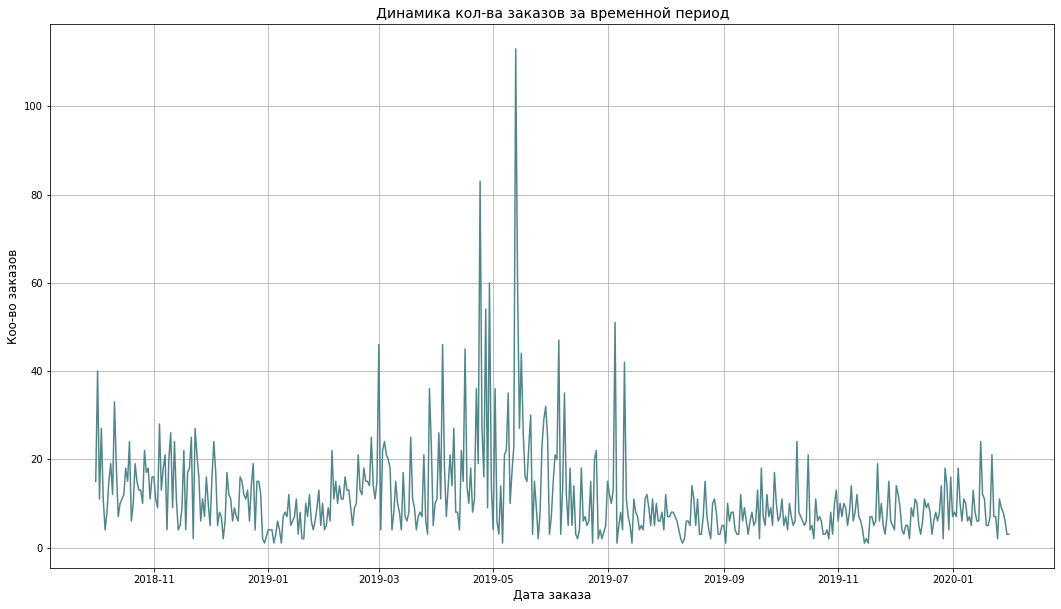

In [29]:
ecom.groupby('date_only').agg({'order_id':'count'}).plot(figsize=(18, 10), color='#53868B', legend=False, grid= True)
plt.title('Динамика кол-ва заказов за временной период',fontsize=14)
plt.xlabel('Дата заказа',fontsize=12)
plt.ylabel('Коо-во заказов',fontsize=12)
plt.show()

Для исследования нам предоставлены данные с 2018-10-01 по 2020-01-31. Аномалий в данных не наблюдается, по графику видно, что среднее кол-во заказов около 10, и только с марта 2019 по июль 2019 года наблюдается кол-во заказов больше 40, а пик кол-ва заказов приходится на май-июнь 2019 года.

In [30]:
#посмотрим на дополнительные величины рапределения
ecom.groupby('date_only').agg({'order_id':'count'}).describe()

,order_id
count,485.000000
mean,11.521649
std,10.576661
min,1.000000
25%,5.000000
50%,9.000000
75%,15.000000
max,113.000000


#### Поиск аномалий в заказах, одному заказу соответствует один пользователь

In [31]:
#кол-во уникальных заказов
len(ecom['order_id'].unique())

3521

In [32]:
#кол-во уникальных пользователей
len(ecom['customer_id'].unique())

2451

In [33]:
tab2= ecom.groupby(['order_id']).agg({'customer_id':'nunique'})\
                    .rename(columns={'customer_id': 'kol_vo'})\
                    .reset_index()

In [34]:
tab2 = tab2.query('kol_vo>1')

In [35]:
tab2.head()

,order_id,kol_vo
248,14872,2
516,68785,2
797,69283,2
817,69310,2
832,69345,2


In [36]:
print('Уникальные заказы с несколькими пользователями: ',len(tab2.query('kol_vo>1')))

Уникальные заказы с несколькими пользователями:  29


In [37]:
#посчитаем кол-во строк, которые соответствуют этим заказас
len(ecom.query('order_id in @tab2.order_id'))

66

Найдено 29 заказов, принадлежащих одновременно от 2-х до 4-х пользователям. Такого быть не должно, видимо возникла какая-то ошибка, или пользователь делал заказы с разных аккаунтов. Удалим эти 29 заказов - 66 строк.

In [38]:
ecom = ecom.query('order_id not in @tab2.order_id')

In [39]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5522 entries, 0 to 7473
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5522 non-null   datetime64[ns]
 1   customer_id  5522 non-null   object        
 2   order_id     5522 non-null   int64         
 3   product      5522 non-null   object        
 4   quantity     5522 non-null   int64         
 5   price        5522 non-null   float64       
 6   date_only    5522 non-null   object        
 7   year         5522 non-null   int64         
 8   month        5522 non-null   int64         
 9   weekday      5522 non-null   int64         
 10  time         5522 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 517.7+ KB


#### Поиск аномальных значений среди клиентов и кол-вом заказов

In [40]:
tab3= ecom.groupby(['customer_id']).agg({'order_id':'nunique'})\
                    .rename(columns={'order_id': 'kol_vo'})\
                    .reset_index()

In [41]:
tab3.sort_values(by='kol_vo', ascending=False)

,customer_id,kol_vo
1885,c971fb21-d54c-4134-938f-16b62ee86d3b,126
730,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1080,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1719,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
...,...,...
977,69cf691b-a6c2-4543-aa8a-8cf42fe4a76e,1
976,69c524f1-dd2a-4c4e-a5b0-def54dc96f9e,1
975,69b17a52-a59b-4656-8d47-375e81e7d5f1,1
974,69897438-1f6c-42f3-8876-ec7f0296072d,1


In [42]:
#посмотрим основные параметры
tab3['kol_vo'].describe()

count    2413.000000
mean        1.447161
std         2.698082
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       126.000000
Name: kol_vo, dtype: float64

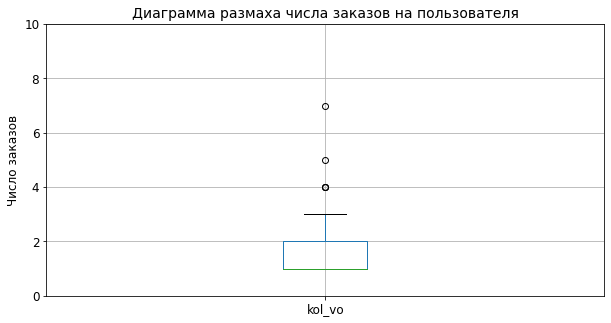

In [43]:
#построим диаграмму размаха числа заказов
tab3.boxplot(column='kol_vo', fontsize=12, figsize = (10,5))
plt.ylim(0, 10)
plt.title('Диаграмма размаха числа заказов на пользователя',fontsize=14)
plt.ylabel('Число заказов',fontsize=12)
plt.show();

Из полученных данных видно, что в среднем один пользователь делает один заказ. Выбросами считается число заказов больше 3. Посмотрим пользователей с самым большим числом заказов более детально

In [44]:
# пользователь с 126 заказами
ecom[ecom['customer_id']=="c971fb21-d54c-4134-938f-16b62ee86d3b"].head(10)

,date,customer_id,order_id,product,quantity,price,date_only,year,month,weekday,time
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379,1,674.0,2018-10-01,2018,10,0,9
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см из хлопка 4738,1,1162.0,2018-10-02,2018,10,1,8
64,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,набор прищепок большие пластиковые rozenbal пиноккио 10 шт r102312,10,86.0,2018-10-03,2018,10,2,8
65,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя напольная adp410,1,749.0,2018-10-03,2018,10,2,10
130,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас...,1,742.0,2018-10-08,2018,10,0,7
131,2018-10-08 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68562,"готовая скатерть ажурная dia rose круглая д.152 белая, 5173, towa co., ltd",1,712.0,2018-10-08,2018,10,0,8
132,2018-10-08 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68563,"сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м",1,614.0,2018-10-08,2018,10,0,9
139,2018-10-08 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68568,"таз пластмассовый 18,0 л квадратный (тп-18) ""пластхозторг"", 1404042",1,254.0,2018-10-08,2018,10,0,13
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0,2018-10-09,2018,10,1,9
171,2018-10-10 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68596,сумка-тележка 3-х колесная gimi tris floral синяя,1,2699.0,2018-10-10,2018,10,2,8


Возможно это какие-то оптовики или перекупщики. Не будем удалять эти данные.
Посмотрим на кол-во товаров в этих заказах.

In [45]:
# кол-во товаров по заказм и пользователям
#tab4= ecom.groupby(['customer_id']).agg({'order_id':'nunique','quantity':'sum'})\
#                    .rename(columns={'order_id': 'kol_zak','quantity':'kol_product'})\
#                    .reset_index()

In [46]:
#tab4.sort_values(by='kol_product', ascending=False)

In [47]:
# кол-во товаров по заказм и пользователям
#tab4= ecom.groupby(['customer_id']).agg({'order_id':'nunique','quantity':'sum'})\
#                    .rename(columns={'order_id': 'kol_zak','quantity':'kol_product'})\
#                    .reset_index()

tab4= ecom.groupby(['order_id']).agg({'quantity':'sum'})\
                    .rename(columns={'quantity': 'kol_product'})\
                    .reset_index()

In [48]:
tab4.sort_values(by='kol_product', ascending=False)

,order_id,kol_product
2021,71743,1000
1984,71668,334
1893,71478,300
404,68611,300
797,69289,200
...,...,...
1816,71291,1
1817,71294,1
1818,71299,1
1819,71300,1


In [49]:
tab4['kol_product'].describe()

count    3492.000000
mean        4.079038
std        21.354144
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1000.000000
Name: kol_product, dtype: float64

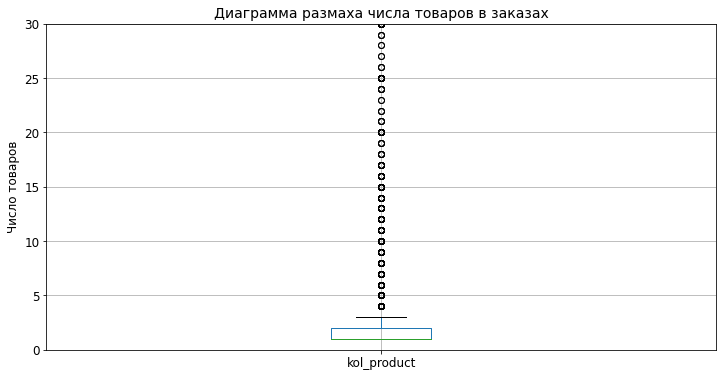

In [50]:
#построим диаграмму размаха числа товаров в заказах на одного пользователя
tab4.boxplot(column='kol_product', fontsize=12, figsize = (12,6))
plt.ylim(0,30)
plt.title('Диаграмма размаха числа товаров в заказах',fontsize=14)
plt.ylabel('Число товаров',fontsize=12)
plt.show();

Из диаграммы видно, что медианное значение составляет 1 товар в заказе. Выбросами считается все, что превышает 3 и более товаров. Максимальное число товаров в заказе 1000 это значение сильно выбивается, удалим этот заказ (71743)	.

In [51]:
#удалим заказ (71743) c аномальным числом товаров
ecom = ecom.query('order_id != 71743')

### Вывод:
На этапе изучения данных и их предобработки было выполнено следующее:
 - преобразовали тип данных столбца date к формату datetime
 - добавили столбцы date_only, month, weekday, hour для дельнейших расчетов
 - столбец product привели к строчному регистру, удалили лишние пробелы, заменили букву ё на е, заменили 'tepмо' на 'термо'
 - пропущенных значений в данных не оказалось
 - явных дубликатов не обнаружили
 - удалили 1886 или 25%  частичных дубликатов (id покупателя, товар, id заказа)
 
Нашли несколько аномалий в данных, избавились от них, а именно изучили 
 - рассматриваемый временной период с 2018-10-01 по 2020-01-31. Аномалий в данных не наблюдается, среднее кол-во заказов около 10, и только с марта 2019 по июль 2019 года наблюдается кол-во заказов больше 40, а пик кол-ва заказов приходится на май-июнь 2019 года.
 - нашли и удалили 29 заказов, принадлежащих одновременно от 2-х до 4-х пользователям. Видимо возникла какая-то ошибка, или пользователь делал заказы с разных аккаунтов. 
 - определили, что в среднем один пользователь делает один заказ. Пользователей с большим числом заказов удалять не стали, так как возможно это оптовики или перекупщики. 
 - изучили кол-во товаров в заказах. Получили, что медианное значение составляет 1 товар в заказе. Максимальное число товаров в заказе 1000 - аномальное значение, удалили данный заказ.

## 3. Исследовательский анализ данных

#### Исследование цены

In [52]:
#посмотрим на параемтры цен товаров
ecom['price'].describe()

count     5521.000000
mean       531.583967
std        975.338897
min          9.000000
25%         90.000000
50%        150.000000
75%        524.000000
max      14917.000000
Name: price, dtype: float64

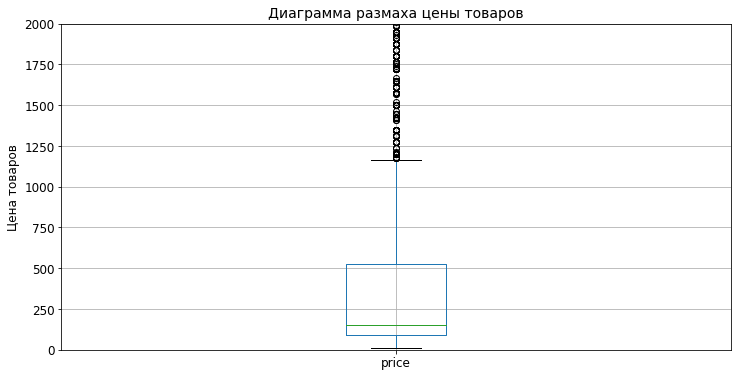

In [53]:
#построим диаграмму размаха цены товаров
ecom.boxplot(column='price',fontsize=12, figsize = (12,6))
plt.ylim(0,2000)
plt.title('Диаграмма размаха цены товаров',fontsize=14)
plt.ylabel('Цена товаров',fontsize=12)
plt.show();

Ассортимен магазина располагает как дешевыми товарами, так и дорогими. Минимальная стоимость товара 9 у.е, максимальная 14917 у.е. Медианная стоимость товара 150 у.е. Выбросами считаются товары со стоимостью более 1100 у.е. Учитывая тот факт, что ассортимент магазина может иметь как дорогие, так и дешевые товары, оставим имеющиеся данные как есть. 

In [54]:
# посмотрим на разброс цен в зависимости от заказов и кол-ва товаров
tab5= ecom.groupby(['order_id']).agg({'quantity':'sum','price':'sum'})\
                    .rename(columns={'quantity':'kol_product','price':'total_zak_price'})\
                    .reset_index()

In [55]:
tab5.sort_values(by='total_zak_price', ascending=False).head(10)

,order_id,kol_product,total_zak_price
501,68760,47,17060.0
2222,72139,1,14917.0
348,68529,2,8758.0
1683,71035,1,8737.0
1365,70423,1,8437.0
1782,71227,1,8077.0
3277,109758,1,8077.0
2670,72992,1,7724.0
2223,72140,1,7679.0
1534,70740,1,7679.0


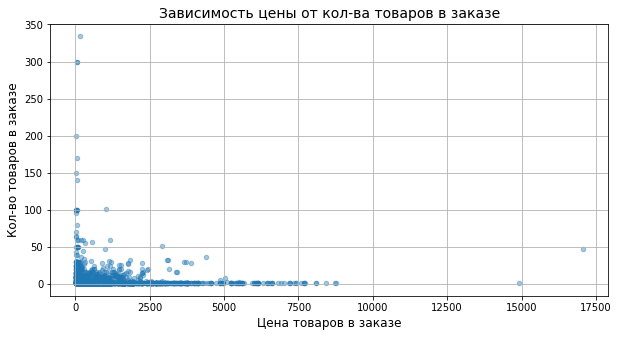

In [56]:
#построим диаграмму рассеивания
tab5.plot(x='total_zak_price', y='kol_product', kind='scatter',grid=True,alpha=0.4, figsize = (10,5))
plt.ylabel('Кол-во товаров в заказе',fontsize=12)
plt.xlabel('Цена товаров в заказе',fontsize=12)
plt.title('Зависимость цены от кол-ва товаров в заказе',fontsize=14,)
plt.show();

In [57]:
print('Коэффициент корреляции Пирсона:', tab5['kol_product'].corr(tab5['total_zak_price']).round(3))

Коэффициент корреляции Пирсона: -0.05


Мы получили отрицательный коэффициент корреляции, это означает, что чем выше одно значение, тем ниже другое. Т.е. чем больше товаров в заказе, тем меньше их стоимость, и чем меньше товаров в заказе, тем больше их стоимость. При этом значение коэффициента ничтожно мало. Это говорит об отсутствии зависимости между величинами.

#### Исследование продаж по месяцам, дням недели и времени суток

##### Исследуем продажи по месяцам

In [58]:
ecom['price_quantity'] = ecom['price']*ecom['quantity']

In [59]:
tab_month_price=ecom.groupby(['year','month']).agg({'price_quantity':'sum','order_id':'nunique'})\
                    .rename(columns={'price_quantity':'price_per_month','order_id':'kol_zak'})\
                    .reset_index()

In [60]:
tab_month_price.style.format({'price_per_month': "{:.0f}"})

,year,month,price_per_month,kol_zak
0,2018,10,350374,237
1,2018,11,359772,204
2,2018,12,341910,276
3,2019,1,234117,167
4,2019,2,304446,286
5,2019,3,249537,243
6,2019,4,316122,264
7,2019,5,228814,176
8,2019,6,233624,159
9,2019,7,226361,197


In [61]:
#посчитаем сумму продаж за все время

total_price = round((ecom['price']*ecom['quantity']).sum())
total_zak=len(ecom['order_id'].unique())
print('Сумма продаж за все время:',total_price, 'у.е.' )
print('Число заказов за все время:', total_zak)

Сумма продаж за все время: 3918179 у.е.
Число заказов за все время: 3491


In [62]:
#Добавим столбец % продаж за месяц  от общей суммы продаж за все время
tab_month_price['percent_price'] = round(tab_month_price['price_per_month']/total_price*100,2)
#Добавим столбец % угикальных заказов за месяц  от общего числа уникальных заказов
tab_month_price['percent_kol_zak'] = round(tab_month_price['kol_zak']/total_zak*100,2)

In [63]:
tab_month_price

,year,month,price_per_month,kol_zak,percent_price,percent_kol_zak
0,2018,10,350374.000000,237,8.94,6.79
1,2018,11,359772.000000,204,9.18,5.84
2,2018,12,341910.000000,276,8.73,7.91
3,2019,1,234117.000000,167,5.98,4.78
4,2019,2,304446.000000,286,7.77,8.19
5,2019,3,249537.000000,243,6.37,6.96
6,2019,4,316122.000000,264,8.07,7.56
7,2019,5,228814.000000,176,5.84,5.04
8,2019,6,233624.000000,159,5.96,4.55
9,2019,7,226361.000000,197,5.78,5.64


In [64]:
tab_month_price['percent_price'].sum()

100.01

In [65]:
tab_month_price['percent_kol_zak'].sum()

100.11

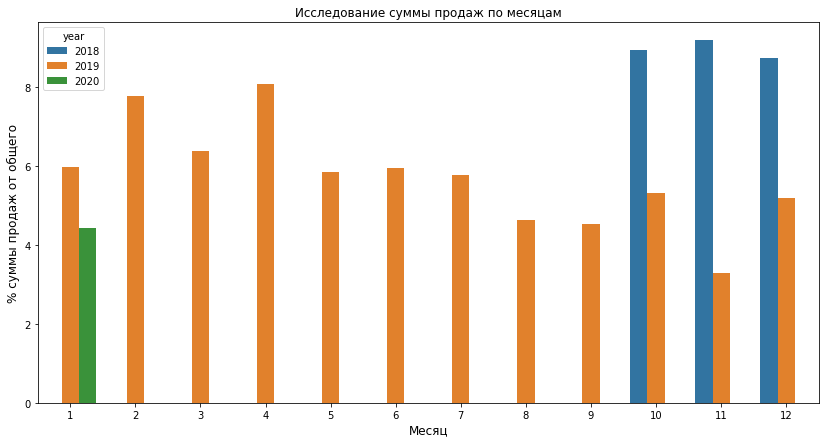

In [66]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(y='percent_price', x='month', hue='year', data=tab_month_price)

ax.set_title('Исследование суммы продаж по месяцам')
plt.xlabel('Месяц',fontsize=12)
plt.ylabel('% суммы продаж от общего',fontsize=12)
plt.show()

Наиболее цельная картина складывается по данным за 2019 год. Самый большой "%суммы продаж" в январе, феврале, марте и апреле от 6 до 8% Меньше всего в августе, сентябре, октябре, ноябре 3-4.5%. Май, июнь, июль - около 6%.

Из графика видно, что "%суммы продаж" по месяцам в разные годы отличался, 2018 год был более прибыльным, по сравнению с 2019 в октябре, ноябре, декабре. Также видно что "%суммы продаж"в январе 2020 больше, чем в январе 2019.

В целом можно сказать, что в первой половине года "%суммы продаж" больше чем во второй.


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

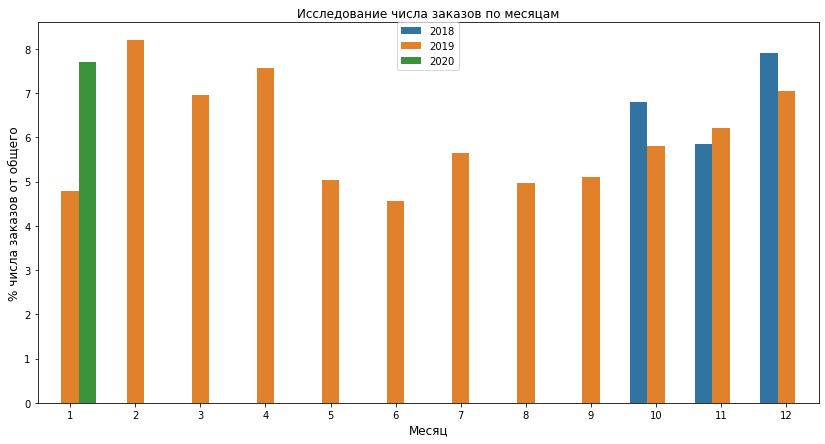

In [67]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(y='percent_kol_zak', x='month', hue='year', data=tab_month_price)

ax.set_title('Исследование числа заказов по месяцам')
plt.xlabel('Месяц',fontsize=12)
plt.ylabel('% числа заказов от общего',fontsize=12)
plt.legend( loc='upper center', borderaxespad=0)
plt.show()

Самый большой "%числа заказов" в декабре, феврале, марте и апреле от 7 до 8%. Меньше всего "%числа заказов" в январе, мае, июне, августе, сентябре 4.5 - 5 %. Июль, октябрь, ноябрь - около 6%.

Из графика видно, что "%числа заказов" по месяцам в разные годы отличался, 2018 год был более прибыльным, по сравнению с 2019 в октябре, и декабре. Также видно что "%числа заказов"  в январе 2020 больше, чем в январе 2019.

В целом можно сказать, что с мая по сентябрь "%числа заказов" меньше чем в другие месяцы.

##### Исследуем продажи по дням недели

In [68]:
tab_weekday_price=ecom.groupby(['weekday']).agg({'price':'sum','order_id':'nunique'})\
                    .rename(columns={'price':'price_per_weekday','order_id':'kol_zak'})\
                    .reset_index()

In [69]:
tab_weekday_price.style.format({'price_per_weekday': "{:.0f}"})

,weekday,price_per_weekday,kol_zak
0,0,485404,585
1,1,479160,592
2,2,472793,534
3,3,450936,551
4,4,404539,465
5,5,293764,342
6,6,348280,433


In [70]:
#Добавим столбец % продаж по дням  от общей суммы продаж за все время
tab_weekday_price['percent_price'] = round(tab_weekday_price['price_per_weekday']/total_price*100,2)
#Добавим столбец % уникальных заказов по дням  от общего числа уникальных заказов
tab_weekday_price['percent_kol_zak'] = round(tab_weekday_price['kol_zak']/total_zak*100,2)

In [71]:
tab_weekday_price

,weekday,price_per_weekday,kol_zak,percent_price,percent_kol_zak
0,0,485404.333333,585,12.39,16.76
1,1,479159.500000,592,12.23,16.96
2,2,472793.166667,534,12.07,15.30
3,3,450936.333333,551,11.51,15.78
4,4,404538.750000,465,10.32,13.32
5,5,293763.500000,342,7.50,9.80
6,6,348279.500000,433,8.89,12.40


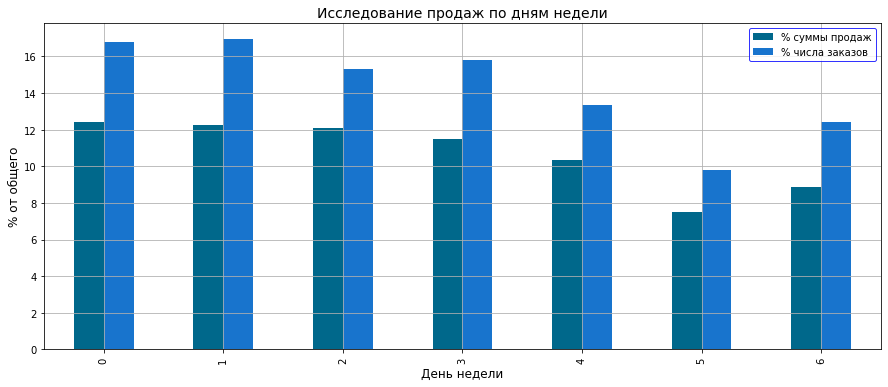

In [72]:
#построим гистограммы
tab_weekday_price[['weekday','percent_price','percent_kol_zak']].plot(x='weekday', kind='bar',grid=True, figsize=(15,6), color=['#00688B','#1874CD'])
plt.xlabel('День недели',fontsize=12)
plt.ylabel('% от общего',fontsize=12)
plt.title('Исследование продаж по дням недели',fontsize=14)
plt.legend(["% суммы продаж", "% числа заказов"],facecolor='w', edgecolor='b',) 
plt.show();

Из диаграммы видно, что меньше всего % продаж в выходные, особенно в субботу, около 10-12%  - % числа заказов, 6-8% %суммы продаж. Больше всего % продаж числа заказов в понедельник и вторник чуть больше 16%. %суммы продаж самый большой с  понедельника по четверг около 10%. % суммы продаж плавно уменьшается к субботе от 11% до 6%, % числа заказов колеблется  по дням недели, то уменьшаясь, то увеличиваясь, но в общем тоже падает к субботе от 17% до 10%. В воскресенье %  суммы продаж около 12%, а числа заказов около 8%.

##### Исследуем продажи по времени суток

In [73]:
tab_time_price=ecom.groupby(['time']).agg({'price':'sum','order_id':'nunique'})\
                    .rename(columns={'price':'price_per_time','order_id':'kol_zak'})\
                    .reset_index()

In [74]:
tab_time_price.style.format({'price_per_time': "{:.0f}"})

,time,price_per_time,kol_zak
0,0,40606,57
1,1,22680,32
2,2,27359,24
3,3,11251,11
4,4,16859,22
5,5,19756,23
6,6,39981,38
7,7,83008,76
8,8,138218,153
9,9,170391,210


In [75]:
#Добавим столбец % продаж по времени  от общей суммы продаж за все время
tab_time_price['percent_price'] = round(tab_time_price['price_per_time']/total_price*100,2)
#Добавим столбец % уникальных заказов по времени  от общего числа уникальных заказов
tab_time_price['percent_kol_zak'] = round(tab_time_price['kol_zak']/total_zak*100,2)

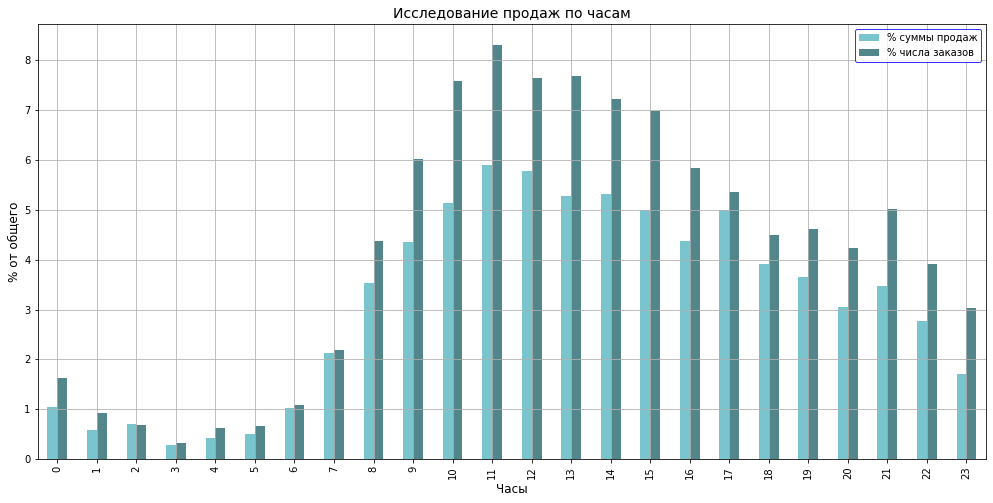

In [76]:
#построим гистограммы
tab_time_price[['time','percent_price','percent_kol_zak']].plot(x='time', kind='bar',grid=True, figsize=(17,8), color=['#7AC5CD','#53868B'])
plt.xlabel('Часы',fontsize=12)
plt.ylabel('% от общего',fontsize=12)
plt.title('Исследование продаж по часам',fontsize=14)
plt.legend(["% суммы продаж", "% числа заказов"],facecolor='w', edgecolor='b',) 
plt.show();

Из диаграммы видно, что больше всего % числа заказов приходится на дневное время с 9 до 17 (от 6 до 8%). Затем % числа заказов плавно уменьшается от 6% до 4%. В 21 час спрос опять растет до 5 % и затем снова уменьшается.  Меньше всего (не превышает 2%) % числа заказов в ночное время с 0 до 6 утра. Диаграмма % суммы продаж похожа на диаграмму % числа заказов.  Больше всего % приходится на дневное время с 9 до 17 (от 3,5 до 5%). В 21 час спрос опять растет до 3 % и затем снова уменьшается.  Меньше всего (не превышает 1%) % суммы продаж в ночное время с 0 до 6 утра.

#### Вывод:
На этапе исследовательского анализа данных выяснили, что
 
 - ассортимен магазина располагает как дешевыми товарами, так и дорогими. Минимальная стоимость товара 9 у.е, максимальная 14917 у.е. Медианная стоимость товара 150 у.е. Выбросами считаются товары со стоимостью более 1100 у.е. Учитывая тот факт, что ассортимент магазина может иметь как дорогие, так и дешевые товары, оставили имеющиеся данные как есть.
 

 - Наиболее цельная картина складывается по данным за 2019 год. Самый большой "%суммы продаж" в январе, феврале, марте и апреле от 6 до 8%. Меньше всего в августе, сентябре, октябре, ноябре 3-4.5%. Май, июнь, июль - около 6%.

"%суммы продаж" по месяцам в разные годы отличался, 2018 год был более прибыльным, по сравнению с 2019 в октябре, ноябре, декабре. Также видно что "%суммы продаж"в январе 2020 больше, чем в январе 2019.
В целом можно сказать, что в первой половине года "%суммы продаж" больше чем во второй.

 - Самый большой "%числа заказов" в декабре, феврале, марте и апреле от 7 до 8%. Меньше всего "%числа заказов" в январе, мае, июне, августе, сентябре 4.5 - 5 %. Июль, октябрь, ноябрь - около 6%.

"%числа заказов" по месяцам в разные годы отличался, 2018 год был более прибыльным, по сравнению с 2019 в октябре, и декабре. Также видно что "%числа заказов" в январе 2020 больше, чем в январе 2019.
В целом можно сказать, что с мая по сентябрь "%числа заказов" меньше чем в другие месяцы.

  - Меньше всего % продаж в выходные, особенно в субботу, около 10-12% - % числа заказов, 6-8% % суммы продаж. Больше всего % продаж с  понедельник по четверг около 16% - % числа заказов, 10% - % суммы продаж .В воскресенье % суммы продаж около 12%, а числа заказов около 8%.
  
  - больше всего "% продаж" приходится на дневное время с 10 до 17 (от 5,5 до 8% - %числа заказов, 4,5-5% - %суммы продаж).  В 21 час спрос опять растет до 5 % - %числа заказов, 3% - % суммы продаж. Меньше всего (не превышает 2% и 1%) "% продаж" в ночное время с 0 до 6 утра.

## 4. Анализ торгового ассортимента

#### Выделим основной и дополнительный ассортимент товаров, используя "ABC - анализ" по выручке;

In [77]:
#посчитаем выручку по каждому товару за все время
ecom['price_quantity'] = ecom['price']*ecom['quantity']

In [78]:
#выведем таблицу с товарами, выручкой
ecom_ABC = ecom.groupby(['product']).agg({'price_quantity':'sum'})\
                    .rename(columns={'price':'price_product'})\
                    .reset_index()

In [79]:
#отсортируем таблицу по выручке
ecom_ABC.sort_values(by='price_quantity', ascending = False)

,product,price_quantity
1186,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0
1607,сумка-тележка 2-х колесная gimi argo синяя,50405.0
187,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0
1885,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0
829,муляж яблоко 9 см красное,32702.0
...,...,...
2127,"цинния коралловая красавица 0,2 г 4660010773323",10.0
2128,"цинния оранжевый король 0,5 г 4660010770520",10.0
764,морковь детская сладость 2 г 4660010775921,10.0
1051,петрушка итальянский гигант 2 г 4660010776553,10.0


In [80]:
#добавим столбец доля выручки от общей стоимости для каждого товара
ecom_ABC['part_of_total_price'] =round( ecom_ABC['price_quantity']/total_price*100,4)

In [81]:
#отсортируем таблицу
ecom_ABC=ecom_ABC.sort_values(by='part_of_total_price', ascending = False)

In [82]:
#добавим столбец с накоплением %
ecom_ABC['total_percent'] = ecom_ABC['part_of_total_price'].cumsum(axis=0)

In [83]:
ecom_ABC

,product,price_quantity,part_of_total_price,total_percent
1186,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0,1.3586,1.3586
1607,сумка-тележка 2-х колесная gimi argo синяя,50405.0,1.2864,2.6450
187,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,1.2658,3.9108
1885,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0,0.8675,4.7783
829,муляж яблоко 9 см красное,32702.0,0.8346,5.6129
...,...,...,...,...
430,"календула суприм 0,5 г 4650091480227",11.0,0.0003,100.0020
1051,петрушка итальянский гигант 2 г 4660010776553,10.0,0.0003,100.0023
370,"земляника барон солемахер 0,04 г 4660010775556",13.0,0.0003,100.0026
454,"капуста декоративная смесь 0,1 г 4650091480234",11.0,0.0003,100.0029


In [84]:
#Разобьем на группы наши товары до 80%, относятся к группе А, 80-95% — к группе В, 95-100% — к группе С.
def categorize_group(total_percent):
    try:
        if total_percent < 80 :
            return 'A'
        elif total_percent >=80 and  total_percent < 95   :
            return 'B'
        elif total_percent >=95 :
            return 'C'
    except:
        pass

In [85]:
#добавим новый столбец, обозначающий группу товара
ecom_ABC['group'] = ecom_ABC['total_percent'].apply(categorize_group)

In [86]:
ecom_ABC

,product,price_quantity,part_of_total_price,total_percent,group
1186,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0,1.3586,1.3586,A
1607,сумка-тележка 2-х колесная gimi argo синяя,50405.0,1.2864,2.6450,A
187,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,1.2658,3.9108,A
1885,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0,0.8675,4.7783,A
829,муляж яблоко 9 см красное,32702.0,0.8346,5.6129,A
...,...,...,...,...,...
430,"календула суприм 0,5 г 4650091480227",11.0,0.0003,100.0020,C
1051,петрушка итальянский гигант 2 г 4660010776553,10.0,0.0003,100.0023,C
370,"земляника барон солемахер 0,04 г 4660010775556",13.0,0.0003,100.0026,C
454,"капуста декоративная смесь 0,1 г 4650091480234",11.0,0.0003,100.0029,C


In [87]:
ecom_ABC[ecom_ABC['group']=="A"]

,product,price_quantity,part_of_total_price,total_percent,group
1186,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0,1.3586,1.3586,A
1607,сумка-тележка 2-х колесная gimi argo синяя,50405.0,1.2864,2.6450,A
187,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,1.2658,3.9108,A
1885,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0,0.8675,4.7783,A
829,муляж яблоко 9 см красное,32702.0,0.8346,5.6129,A
...,...,...,...,...,...
867,"набор махровых салфеток фит_3, 100% хлопок 315 г/м2, 34х35 см, 3 шт, цвета в ассортименте, welln...",1568.0,0.0400,79.8394,A
1014,пеларгония зональная махровая микс d-12 см,1547.0,0.0395,79.8789,A
895,"насадка на валик вмм-200/60 белый искусственный мех, 0703011",1540.0,0.0393,79.9182,A
177,вешалка-перекладина valiant металлическая двойная с антискользящим покрытием 50320,1536.0,0.0392,79.9574,A


In [88]:
#выведем таблицу с товарами,продажами
ecom_ABC2 = ecom.groupby(['product']).agg({'quantity':'sum'})\
                    .rename(columns={'quantity':'kol'})\
                    .reset_index()
#отсортируем таблицу
ecom_ABC2=ecom_ABC2.sort_values(by='kol', ascending = False)

In [89]:
ecom_ABC2

,product,kol
829,муляж яблоко 9 см красное,618
187,вешалки мягкие для деликатных вещей 3 шт шоколад,335
1443,"ручка-скоба рс-100 белая *трибатрон*, 1108035",201
657,"крепеж для пружины дверной, 1107055",170
1106,плечики пластмассовые размер 52 - 54 тула 1205158,160
...,...,...
1658,сумка-тележка хозяйственная rolser imx004 azul logic rg синяя,1
1055,петрушка листовая универсал в кассете 4 штуки среднеспелая,1
1053,петрушка листовая итальянский гигант в кассете 4 штуки среднеспелая,1
1662,сумка-тележка хозяйственная rolser jea021 rojo convert красная,1


In [90]:
#добавим столбец доля товаров от общего кол-ва товаров
ecom_ABC2['part_of_kol'] =round( ecom_ABC2['kol']/(ecom_ABC2['kol'].sum())*100,4)
ecom_ABC2=ecom_ABC2.sort_values(by='part_of_kol', ascending = False)

In [91]:
#добавим столбец с накоплением %
ecom_ABC2['kol_percent'] = ecom_ABC2['part_of_kol'].cumsum(axis=0)

In [92]:
ecom_ABC2

,product,kol,part_of_kol,kol_percent
829,муляж яблоко 9 см красное,618,4.6663,4.6663
187,вешалки мягкие для деликатных вещей 3 шт шоколад,335,2.5294,7.1957
1443,"ручка-скоба рс-100 белая *трибатрон*, 1108035",201,1.5177,8.7134
657,"крепеж для пружины дверной, 1107055",170,1.2836,9.9970
1106,плечики пластмассовые размер 52 - 54 тула 1205158,160,1.2081,11.2051
...,...,...,...,...
67,"бакопа ампельная мега-крупная сиреневая объем 0,5 л",1,0.0076,100.0370
622,"корзина мягкая пластиковая 17 л, м-пластика, m2880",1,0.0076,100.0446
2101,цветок искусственный тюльпан 45 см пластик цвет в ассортименте,1,0.0076,100.0522
618,корзина для белья эльфпласт виола 30 л бежевая 204,1,0.0076,100.0598


In [93]:
#добавим новый столбец, обозначающий группу товара
ecom_ABC2['group'] = ecom_ABC2['kol_percent'].apply(categorize_group)

In [94]:
ecom_ABC2

,product,kol,part_of_kol,kol_percent,group
829,муляж яблоко 9 см красное,618,4.6663,4.6663,A
187,вешалки мягкие для деликатных вещей 3 шт шоколад,335,2.5294,7.1957,A
1443,"ручка-скоба рс-100 белая *трибатрон*, 1108035",201,1.5177,8.7134,A
657,"крепеж для пружины дверной, 1107055",170,1.2836,9.9970,A
1106,плечики пластмассовые размер 52 - 54 тула 1205158,160,1.2081,11.2051,A
...,...,...,...,...,...
67,"бакопа ампельная мега-крупная сиреневая объем 0,5 л",1,0.0076,100.0370,C
622,"корзина мягкая пластиковая 17 л, м-пластика, m2880",1,0.0076,100.0446,C
2101,цветок искусственный тюльпан 45 см пластик цвет в ассортименте,1,0.0076,100.0522,C
618,корзина для белья эльфпласт виола 30 л бежевая 204,1,0.0076,100.0598,C


Мы получили товары, распределенные по 3-м группам. Такая группировка показывает, какие позиции приносят наибольшую прибыль. Товары группы А являются целевыми — на них нужно сосредоточиться, больше производить/закупать/продавать. Нужно следить, чтобы они всегда были в наличии, организовать бесперебойные поставки, обеспечить должный контроль производства и качества.

Товары из группы В приносят немного прибыли. Однако они расширяют ассортимент и обеспечивают небольшой, но стабильный доход.

Товары из группы С не приносят прибыли и практически не покупаются. Нужно попытаться понять, почему от них низкая отдача. Возможно, от этих позиций стоит отказаться.

Выделим товары, которые приносят наименьшую прибыль, это будут товары из  группы С по прибыли и кол-ву.

In [95]:
#объединим 2 таблицы
ecom_final = ecom_ABC.merge(ecom_ABC2, on='product', suffixes=('_of_total_price', '_of_kol'))

In [96]:
ecom_final.query('group_of_total_price =="C" and group_of_kol=="C" ')

,product,price_quantity,part_of_total_price,total_percent,group_of_total_price,kol,part_of_kol,kol_percent,group_of_kol
1324,"коврик в ванну 36х71 см, розовый",442.0,0.0113,95.0516,C,1,0.0076,95.7354,C
1325,сушилка для белья потолочная лиана люкс 150 см ллп-150,442.0,0.0113,95.0629,C,1,0.0076,96.4574,C
1331,гортензия микс d-12 см,434.0,0.0111,95.1302,C,1,0.0076,98.8970,C
1332,чехол для одежды дорожный eva 100х65 см mhl06,434.0,0.0111,95.1413,C,1,0.0076,97.1414,C
1333,"насадка-отжим пластиковая бирюзовая для ведра classic mop, leifheit, 52002",434.0,0.0111,95.1524,C,1,0.0076,97.1034,C
...,...,...,...,...,...,...,...,...,...
2324,"цинния коралловая красавица 0,2 г 4660010773323",10.0,0.0003,100.0014,C,1,0.0076,98.5474,C
2325,настурция лунный свет 1 г 4660010779660,12.0,0.0003,100.0017,C,1,0.0076,98.0534,C
2327,петрушка итальянский гигант 2 г 4660010776553,10.0,0.0003,100.0023,C,1,0.0076,95.6974,C
2329,"капуста декоративная смесь 0,1 г 4650091480234",11.0,0.0003,100.0029,C,1,0.0076,98.8818,C


Мы получили товары, которые не приносят прибыли и практически не покупаются. Вероятнее всего, от этих позиций стоит отказаться. Таких товаров 427 шт.

Выделим товары, которые приносят наибольшую прибыль, это будут товары из  группы A по прибыли и кол-ву.

In [97]:
ecom_final.query('group_of_total_price =="A" and group_of_kol=="A" ')

,product,price_quantity,part_of_total_price,total_percent,group_of_total_price,kol,part_of_kol,kol_percent,group_of_kol
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0,1.3586,1.3586,A,30,0.2265,38.8025,A
1,сумка-тележка 2-х колесная gimi argo синяя,50405.0,1.2864,2.6450,A,47,0.3549,33.9775,A
2,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,1.2658,3.9108,A,335,2.5294,7.1957,A
3,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0,0.8675,4.7783,A,59,0.4455,30.1495,A
4,муляж яблоко 9 см красное,32702.0,0.8346,5.6129,A,618,4.6663,4.6663,A
...,...,...,...,...,...,...,...,...,...
622,"набор махровых салфеток фит_3, 100% хлопок 315 г/м2, 34х35 см, 3 шт, цвета в ассортименте, welln...",1568.0,0.0400,79.8394,A,7,0.0529,66.6762,A
623,пеларгония зональная махровая микс d-12 см,1547.0,0.0395,79.8789,A,6,0.0453,68.2480,A
624,"насадка на валик вмм-200/60 белый искусственный мех, 0703011",1540.0,0.0393,79.9182,A,70,0.5285,25.3927,A
625,вешалка-перекладина valiant металлическая двойная с антискользящим покрытием 50320,1536.0,0.0392,79.9574,A,12,0.0906,55.9438,A


Мы получили товары, которые приносят больше всего прибыли и покупаются чаще всего. Таких товаров 232 шт.

In [98]:
ecom_final = ecom_final.loc[:,['product','group_of_total_price','group_of_kol']]

In [99]:
ecom_final

,product,group_of_total_price,group_of_kol
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,A,A
1,сумка-тележка 2-х колесная gimi argo синяя,A,A
2,вешалки мягкие для деликатных вещей 3 шт шоколад,A,A
3,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,A,A
4,муляж яблоко 9 см красное,A,A
...,...,...,...
2326,"календула суприм 0,5 г 4650091480227",C,B
2327,петрушка итальянский гигант 2 г 4660010776553,C,C
2328,"земляника барон солемахер 0,04 г 4660010775556",C,B
2329,"капуста декоративная смесь 0,1 г 4650091480234",C,C


In [100]:
#Разобьем на основные и дополнительные  наши товары 
# АА, АВ, АС, ВВ, ВА, BC - основные  
# СА, СВ, СС - дополнительные
def categorize_product(row):
    group1 = row['group_of_total_price']
    group2 = row['group_of_kol']
    try:
        if group1 == "A" and group2 == "A":
            return 'основной'
        if group1 == "A" and group2 == "B":
            return 'основной'
        if group1 == "A" and group2 == "C":
            return 'дополнительный'
        
        if group1 == "B" and group2 == "A":
            return 'основной'
        if group1 == "B" and group2 == "B":
            return 'дополнительный'
        if group1 == "B" and group2 == "C":
            return 'дополнительный'
        
        
        if group1 == "C" and group2 == "A":
            return 'дополнительный'
        if group1 == "C" and group2 == "B":
            return 'дополнительный'
        if group1 == "C" and group2 == "C":
            return 'аутсайдер'
        
    except:
        pass

In [101]:
#добавим новый столбец, обозначающий группу товара
ecom_final['group_product'] = ecom_final.apply(categorize_product,axis=1)

In [102]:
ecom_final

,product,group_of_total_price,group_of_kol,group_product
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,A,A,основной
1,сумка-тележка 2-х колесная gimi argo синяя,A,A,основной
2,вешалки мягкие для деликатных вещей 3 шт шоколад,A,A,основной
3,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,A,A,основной
4,муляж яблоко 9 см красное,A,A,основной
...,...,...,...,...
2326,"календула суприм 0,5 г 4650091480227",C,B,дополнительный
2327,петрушка итальянский гигант 2 г 4660010776553,C,C,аутсайдер
2328,"земляника барон солемахер 0,04 г 4660010775556",C,B,дополнительный
2329,"капуста декоративная смесь 0,1 г 4650091480234",C,C,аутсайдер


С помощью ABC - анализа разбили товары на основные и дополнительные в зависимости от дохода и продаж, еще добавили категорию аутсайдеры - СС, товары которые приносят меньше всего прибыли и не продаются.

In [103]:
ecom = ecom.merge(ecom_final, on='product')

In [104]:
ecom.head()

,date,customer_id,order_id,product,quantity,price,date_only,year,month,weekday,time,price_quantity,group_of_total_price,group_of_kol,group_product
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,10,0,0,142.0,B,A,основной
1,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-11,2018,10,3,13,142.0,B,A,основной
2,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-18,2018,10,3,14,142.0,B,A,основной
3,2019-02-10 10:00:00,0a4e4711-5cb7-4bae-93cf-6731902708de,70186,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2019-02-10,2019,2,6,10,142.0,B,A,основной
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,10,0,0,194.0,C,B,дополнительный


In [105]:
ecom_gr_pro = ecom.groupby(['group_product']).agg({'product':'nunique'})\
                    .rename(columns={'product':'kol'})\
                    .reset_index()

In [106]:
ecom_gr_pro = ecom_gr_pro.sort_values(by='kol',ascending=False)

In [169]:
# строим интерактивную столбчатую диаграмму 
fig = px.bar(ecom_gr_pro,# выводим график, # загружаем данные и заново их сортируем
             x='group_product', # указываем столбец с данными для оси X
             y='kol', # указываем столбец с данными для оси Y
             text='kol',# добавляем аргумент, который отобразит текст с информацией
        #     color='category'
            )
# оформляем график
fig.update_layout(title='Количество уникальных товаров по категориям в зависимости от выручки и продаж',
                   xaxis_title='Категория товара',
                   yaxis_title='Количество',
                   width=800, # указываем размеры графика
                   height=600,)
fig.show() # выводим график

### Разобьем товары на категории по предметной области

In [108]:
#посчитаем кол-во уникальных товаров
print('Количество уникальных товаров:', len(ecom['product'].unique()))

Количество уникальных товаров: 2331


In [109]:
#избавимся от цифр и английских букв в строках
ecom['product_clear'] =  ecom['product'].apply(lambda x: re.sub(r'[^А-Яа-яd -]', '', str(x)))    
# уберем d и -
ecom['product_clear']=ecom['product_clear'].apply(lambda x:re.sub(r'[d|-]', ' ',str(x)))
#замеим 3 и 2 пробела на 1
ecom['product_clear'] = ecom['product_clear'].str.replace(' см', ' ', regex=True)
ecom['product_clear'] = ecom['product_clear'].str.replace(' м ', ' ', regex=True)
ecom['product_clear'] = ecom['product_clear'].str.replace(' мм ', ' ', regex=True)
ecom['product_clear'] = ecom['product_clear'].str.replace(' шт', ' ', regex=True)
ecom['product_clear'] = ecom['product_clear'].str.replace(' х ', ' ', regex=True)
ecom['product_clear'] = ecom['product_clear'].str.replace(' л ', ' ', regex=True) 
ecom['product_clear'] = ecom['product_clear'].str.replace(' диам', ' ', regex=True)
ecom['product_clear'] = ecom['product_clear'].str.replace('   ', ' ', regex=True)
ecom['product_clear'] = ecom['product_clear'].str.replace('  ', ' ', regex=True)
#удалм все пробелы в конце строки
ecom['product_clear']= ecom['product_clear'].str.rstrip()

In [110]:
ecom.head(10)

,date,customer_id,order_id,product,quantity,price,date_only,year,month,weekday,time,price_quantity,group_of_total_price,group_of_kol,group_product,product_clear
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,10,0,0,142.0,B,A,основной,комнатное растение в горшке алое вера
1,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-11,2018,10,3,13,142.0,B,A,основной,комнатное растение в горшке алое вера
2,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-18,2018,10,3,14,142.0,B,A,основной,комнатное растение в горшке алое вера
3,2019-02-10 10:00:00,0a4e4711-5cb7-4bae-93cf-6731902708de,70186,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2019-02-10,2019,2,6,10,142.0,B,A,основной,комнатное растение в горшке алое вера
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,10,0,0,194.0,C,B,дополнительный,комнатное растение в горшке кофе арабика
5,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-04,2018,10,3,9,194.0,C,B,дополнительный,комнатное растение в горшке кофе арабика
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,0,0,112.0,C,B,дополнительный,радермахера
7,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,10,0,0,179.0,C,B,дополнительный,хризолидокарпус лутесценс
8,2019-11-03 17:00:00,74a644e5-0be7-4dce-9136-c4d04a3ee35b,110320,хризолидокарпус лутесценс d-9 см,1,179.0,2019-11-03,2019,11,6,17,179.0,C,B,дополнительный,хризолидокарпус лутесценс
9,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,0,0,112.0,A,A,основной,циперус зумула


In [111]:
# Уникальные значения столбца 'product'
unique_product = ecom['product_clear'].unique() 
# Выделим леммы в значениях столбца с наименованием товара, которые пригодятся для создания словаря для категоризации товара.
m = Mystem()
string = '; '.join(unique_product) # сохраним результат в переменной string
lemmas = m.lemmatize(string) # сохраним результат в переменной lemmas

# посчитаем количество упоминаний, вызовом Counter из модуля collections
#print(Counter(lemmas).most_common())

Просмотрев полученные данные, выделили несколько категорий товаров:
 - хранение
 - кухня/посуда
 - ванная/туалет
 - текстиль/интерьер
 - уборка
 - cад/огород
 - ремонт


In [112]:
# Cоздадим словарь с категориями и списком слов

category_dictionary = { 
      'хранение' :['бак для белья','вакуумный','весы','петля','вешалка','вешалки','вкладыши','корзина','короб','коробка','кофр', 
                'крючок','обувная','мусора','монетчатый','мусорный','набор вешалок','котовник','петля', 
                'сумка','тележ','плечики','полки','решетка','складная','стеллаж','сумка','тележка',
                'хозяйственная','урна','этажерка','ящик','комод','карниз','пуф','обувниц','светиль','фото',
               'для обув','защитный','обувница','обуви','светильник','фиксатор-шар'],           
    
    'кухня/посуда' :['лоток','сотейник','банка','бидон','блюдо','блюдце','ваза','вилка','разделочная','емкость','жестяная','измельчитель',
             'картофелемялка','кастрюля','кипятильник','кисточка','хлебница','кружка',
             'крышка', 'кувшин', 'кухонные','столовая','чайная','холодца','мантоварка','пищевой'
             'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','миска','модульная', 
             'набор бокалов','набор для пикника','набор ножей','набор стаканов','набор столовых приборов', 'набор форм',
             'набор фужеров','набор кружек','чайный набор','фужер','стакан','салатник','нож','ножеточка','овощеварка','овощечистка',
             'просеиватель','противень','разделочная','салатник','салфет','сковорода',
             'скребок','соковарка','соковыжималка','стакан','стеклянная','тepмокружка','тарелка', 'терка',
             'термокружка','толкушка','форма','хлебница','ложка','чайная','чайник','электроштопор','сито',
             'подставка для яйца','рыбочистка','пресс для чеснока','термос','бульонница','скалка','венчик','набор посуды','половник','eрш бутылочный'],   
    
    'ванная/туалет' :['ванна','вантуз','ведро','держатель','дозатор','ерш','запасная','ванной','ванной', 
              'ковш','мыльница','подголовник','пробка','унитаз','зубная','мыло','жидкое','мыло-скраб','увлажняющая','маска','фен','сиденье'],
    
    'текстиль/интерьер':['скатерть','двуспальное','постельное','белье', 'ковер', 'кольца', 'штор', 'полотенце','штора', 
             'ковeр','коврик', 'махровое','халат','набор ковров', 'наволочка', 'наматрасник', 'одеяло', 'плед', 
             'полотен','простыня','скатерть','халат','штора',
             'простынь вафельна', 'наматрацник', 'покрывало','подушка',
             'искусственная', 'искусственный', 'декоративная', 'котовник', 'муляж', 'новогоднее', 'подарочный',
             'фоторамка','ключница','пододеяльник'],
    
     'уборка' :['ароматизиро', 'белье', 'прищепки','веник','гипоаллергенный','гель','гладильная','набор vileda', 
              'набор прищепок','доска','губка','гладильная','защитная','соль','кондиционер','контейнер','стирки', 
              'насадка', 'насадка','швабры','мытья','швабре','сушилка','настенная','настурция','ведра', 
              'пена','перчатки','тряп','швабр','совок','гладил','глажен','прищеп','налет','антижир','пылесос','крем', 
              'стир', 'сушилк','веник','подрукавник','совком', 'для чистки','стирки','мыть', 'средство',
              'мойк', 'утюг', 'покрытие','гладильной', 'пылесос','гладильной','совок','средство', 
              'таз','тряпка','корзина','швабра','щетка','щетка-сметка','средство', 'таз', 'корыто', 'паста для полировки', 
              'вантуз', 'швабр','губка','веник','сменный','дозатор', 'насадка', 'сметка', 'скребок', 'окномойка',
              'совок','чистящий','чистки','антижир','ведр','тряпка','отбеливатель','для стирки','стиральный',
              'подкладка','чехол', 'ароматизированное средство','ткань универсальная'],
    
    'cад/огород' :['а патио','адиантум','азалия','аквилегия','алиссум','амариллис','альбука','андесса','антижир',
           'арбуз','артемизия','аспарагус','астра','ахарница','бадан','базилик','табак','бак','баклажан',
           'бакопа','бальза','барвинок','бархатцы','бегония','буддлея', 'бузульник', 'валериана', 'вербена',
           'виола', 'газания', 'гвоздика','гардения', 'георгина', 'герань', 'гербера', 'гимнокалициум', 'гиностемма',
           'гипсофила','годеция','горох','гортензия', 'декабрист', 'декоративная','дендробиум', 
           'джункус', 'томата', 'диффенбахия','дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 
           'змееголовник', 'импатиенс','иссоп','сантолина', 'кабачок', 'каланхое', 'календула', 'калибрахоа', 
           'калла', 'калоцефалус', 'камнеломка','кампанула', 'капуста', 'кипарисовик', 'клен', 'клубника',
           'колокольчик', 'растение', 'кориандр','космея', 'крассула', 'крокусы','лаванда', 'мята', 'лантана', 
           'лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток','мединилла','мелисса','многолетнее', 'молодило',
           'петрушка','морковь', 'мята', 'настурция','незабудка','нолина', 'огурец', 'растение','однолетнее', 'осина',
           'орехоколка','патиссон','пахира', 'пеларгония', 'пеларгония', 'петрушка', 'петуни', 'подвесное',
           'цветов','портулак', 'примула', 'пуансеттия','радермахера', 'роза','розмарин','рудбекия','скиммия', 
           'спатифиллум','суккулент','сциндапсус', 'тимьян','томат', 'томата', 'тортница', 'тюльпан', 'рассада', 
           'ранункулус','тыква', 'фаленопсис','фиалка', 'фикус', 'фиттония', 'флокс', 'фуксия', 'хризантема', 
           'целозия', 'цикламен', 'шалфей','эвкалипт','эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера',
           'хризолидокарпус', 'циперус', 'юкка нитчатая', 'рассада зелени для кухни', 'нефролепис', 'овсянница сизая серый',
           'хлорофитум', 'комнатное растение в горшке','калатея','мирт','глоксиния','афеляндра','антуриум','душица','каллуна',
            'капсикум','мимоза','соланум','кореопсис','цинерария','пуансетия ',
           'подсолнечник','аптения','алоэ','кодонанта','кофе арабика','эхинокактус','укроп','гиацинт','смолевка','цинния','лавр',
           'эхинацея','лилейник','платикодон','энотера','цитрофортунелла','пеперомия','девичий виноград','лобелия','мускари','пиретрум',
           'муррайя','вероника','драцена','фатсия','хоста','гайлардия','монарда','нивянник','пряные травы','солидаго','физостегия','лаватера',
            'вигна лилиана','анемона','хамедорея','салат рукола'],
    
    'ремонт' :['инструмент','сверел','сверло','напильник','стремянк','стяжк','шпингалет','сварка',
                   'миксер','крепеж','пружин','петл','линейк','гои','бензин','завертка','крепеж','лестница',
                   'линейка','лопатка','шнур','строительного','многофункциональный','набор прецизионных','полировки',
                   'пьезозажигалка', 'ручка','сверло','седум','сетка','сметка','стремянка','стяжка','термометр',
                   'уголок','фарфоровая','сварка','шило','шнур','шпагат','штангенциркуль','котел','eрш радиаторный','основание','фал'],
}

In [113]:
# Функция возвращает категорию по значению  в product.
def categorize_product(product):
    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category


In [114]:
#добавим столбец с категориями
ecom['category'] = ecom['product'].apply(categorize_product)

In [115]:
display(ecom.shape)
#вывод всех строк таблицы
#pd.set_option('display.max_rows', None)

(5521, 17)

In [116]:
ecom.head(10)

,date,customer_id,order_id,product,quantity,price,date_only,year,month,weekday,time,price_quantity,group_of_total_price,group_of_kol,group_product,product_clear,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,10,0,0,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
1,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-11,2018,10,3,13,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
2,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-18,2018,10,3,14,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
3,2019-02-10 10:00:00,0a4e4711-5cb7-4bae-93cf-6731902708de,70186,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2019-02-10,2019,2,6,10,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,10,0,0,194.0,C,B,дополнительный,комнатное растение в горшке кофе арабика,cад/огород
5,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-04,2018,10,3,9,194.0,C,B,дополнительный,комнатное растение в горшке кофе арабика,cад/огород
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,0,0,112.0,C,B,дополнительный,радермахера,cад/огород
7,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,10,0,0,179.0,C,B,дополнительный,хризолидокарпус лутесценс,cад/огород
8,2019-11-03 17:00:00,74a644e5-0be7-4dce-9136-c4d04a3ee35b,110320,хризолидокарпус лутесценс d-9 см,1,179.0,2019-11-03,2019,11,6,17,179.0,C,B,дополнительный,хризолидокарпус лутесценс,cад/огород
9,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,0,0,112.0,A,A,основной,циперус зумула,cад/огород


In [117]:
#кол-во товаров по категориям
ecom['category'].value_counts()

cад/огород           2734
уборка                821
хранение              688
текстиль/интерьер     552
кухня/посуда          424
ванная/туалет         202
ремонт                100
Name: category, dtype: int64

Выделили 7 категорий товаров :
 - хранение 
 - кухня/посуда
 - ванная/туалет
 - текстиль/интерьер
 - уборка
 - cад/огород
 - ремонт. 

По кол-ву товаров самая большая категория - сад/огород 2669 товаров, далее идут уборка - 820 товаров и хранение - 761. Меньше всего товаров в категории ремонт - 97. Текстиль/интерьер-541, кухня/посуда - 433, ванная/туалет - 203.

In [118]:
ecom.head(15)

,date,customer_id,order_id,product,quantity,price,date_only,year,month,weekday,time,price_quantity,group_of_total_price,group_of_kol,group_product,product_clear,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018,10,0,0,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
1,2018-10-11 13:00:00,4d59d9e7-55be-43a0-88c4-8e7261c5c6d5,68610,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-11,2018,10,3,13,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
2,2018-10-18 14:00:00,b371ce80-259a-4bb8-a550-0ebff690e3e1,68682,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-18,2018,10,3,14,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
3,2019-02-10 10:00:00,0a4e4711-5cb7-4bae-93cf-6731902708de,70186,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2019-02-10,2019,2,6,10,142.0,B,A,основной,комнатное растение в горшке алое вера,cад/огород
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018,10,0,0,194.0,C,B,дополнительный,комнатное растение в горшке кофе арабика,cад/огород
5,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-04,2018,10,3,9,194.0,C,B,дополнительный,комнатное растение в горшке кофе арабика,cад/огород
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018,10,0,0,112.0,C,B,дополнительный,радермахера,cад/огород
7,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018,10,0,0,179.0,C,B,дополнительный,хризолидокарпус лутесценс,cад/огород
8,2019-11-03 17:00:00,74a644e5-0be7-4dce-9136-c4d04a3ee35b,110320,хризолидокарпус лутесценс d-9 см,1,179.0,2019-11-03,2019,11,6,17,179.0,C,B,дополнительный,хризолидокарпус лутесценс,cад/огород
9,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018,10,0,0,112.0,A,A,основной,циперус зумула,cад/огород


### Определим топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период;

In [119]:
# группируем данные по товарам  
top5_orders = ecom.groupby('product').agg({'category':'first', 'order_id':'nunique','quantity':'sum', 'price_quantity':'sum'})\
                           .reset_index().sort_values(by='order_id', ascending=False)
top5_orders.columns = ['product', 'category', 'orders', 'quantity', 'price_quantity']

In [120]:
# топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период
for category in top5_orders['category'].unique():
    print()
    display("Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «{}»".format(category))
    display(top5_orders[top5_orders['category']==category].head(5))
    print()

'Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «cад/огород»'

,product,category,orders,quantity,price_quantity
1033,пеларгония розебудная red pandora укорененный черенок,cад/огород,65,80,10794.333333
1031,пеларгония розебудная prins nikolai укорененный черенок,cад/огород,54,61,8224.500000
1005,пеларгония зональная диам. 12 см сиреневый полумахровый,cад/огород,53,64,10949.000000
1030,пеларгония розебудная mary укорененный черенок,cад/огород,40,48,6470.500000
1029,пеларгония розебудная margaretha укорененный черенок,cад/огород,31,47,6356.666667


'Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «хранение»'

,product,category,orders,quantity,price_quantity
1607,сумка-тележка 2-х колесная gimi argo синяя,хранение,47,47,50405.00
1881,тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия,хранение,17,17,12453.75
1880,тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас...,хранение,16,17,11749.00
1616,сумка-тележка 2-х колесная складная gimi flexi зеленая,хранение,11,12,19788.00
1879,тележка багажная delta тбр-15 цвет в ассортименте грузоподъемность 30 кг россия,хранение,10,10,6446.00


'Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «уборка»'

,product,category,orders,quantity,price_quantity
1759,сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м,уборка,17,20,5533.0
1779,"сушилка для белья потолочная лиана 2,0 м 1703009",уборка,11,11,6589.0
1838,"таз пластмассовый со стиральной доской (иж), 1404021",уборка,10,10,3394.0
1781,"сушилка для белья потолочная лиана 2,4 м 1703011",уборка,10,11,8074.0
1755,сушилка для белья напольная ника сбп1/с 18 м,уборка,9,10,5990.0


'Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «текстиль/интерьер»'

,product,category,orders,quantity,price_quantity
769,муляж баклажан 18 см,текстиль/интерьер,10,23,1357.000000
382,искусственная композиция из цветов пластиковая ромашка мини розовая,текстиль/интерьер,9,21,1181.666667
914,новогоднее дерево ель сербская d-21 см h-60 см,текстиль/интерьер,8,9,9441.000000
2086,цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см,текстиль/интерьер,8,97,2028.000000
795,муляж зеленое яблоко полиуретан d-6 см,текстиль/интерьер,8,16,352.000000


'Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «ванная/туалет»'

,product,category,orders,quantity,price_quantity
4,"eрш унитазный с деревянной ручкой, ваир 1712012",ванная/туалет,8,103,5633.0
2265,"штора для ванной комнаты quadretto 240х200 см белая, bacchetta, 4062",ванная/туалет,5,5,5995.0
1489,"сиденье в ванну раздвижное, белый, св5, ника",ванная/туалет,5,6,1728.0
2234,"штанга для ванной г-образная, угловая 80х170 см, хром",ванная/туалет,5,5,4870.0
2004,тряпкодержатель с металлическим креплением (г) 1804015,ванная/туалет,4,5,595.0


'Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «ремонт»'

,product,category,orders,quantity,price_quantity
1600,"стяжка оконная с болтом ст-55 цинк, 1108354",ремонт,6,101,1964.333333
103,"бензин для зажигалок, 1205214",ремонт,4,6,402.000000
700,лестница стремянка зми конeк медный антик тс 277,ремонт,3,3,2922.000000
711,"линейка, длина 30 см, truper, rgl-30/14387",ремонт,3,3,741.000000
2019,"фал капроновый 6 мм в бухте 300м т-1, 1201050",ремонт,3,3,6297.000000


'Топ-5 самых продаваемых товаров по кол-ву заказов в категории : «кухня/посуда»'

,product,category,orders,quantity,price_quantity
930,"овощеварка алюминиевая scovo мт-045, хозлэнд, 1502079",кухня/посуда,5,5,2245.0
682,"кувшин пластмассовый с крышкой ""кумган"" 2,0 л 1408003",кухня/посуда,5,5,745.0
1905,термокружка яромир кремль яр-2406м 400 мл,кухня/посуда,5,5,1603.0
1457,салатник luminarc эмпилабль велада 17 см l7997,кухня/посуда,5,5,820.0
86,"банка со стеклянной крышкой, color series, круглая, 7*7,6*12,5 см, 280 мл valiant, jp-s280",кухня/посуда,5,6,360.0


 - В категории сад/огород самыми продаваемыми товарами является пеларгония(герань).

 - В категории хранение самыми продаваемыми товарами являются сумки-тележки и тележки.

 - В категории уборка наибольшей популярностью пользуются сушилки для белья (настенные, потолочные, напольные) и пластмассовые тазы.

 - В категории текстиль/интерьер наиболее популярны муляжи овощей и фруктов, искусственные цветочные композиции и новогодние ели.

 - В категории ванная/туалет наиболее популярны ершики для унитаза, шторы и штанги и сиденье для ванны.

 - В категории ремонт самые продаваемые товары оконные стяжки, бензин для зажигалок, термометры уличные, линейки.

 - В категории кухня/посуда наибольшим спросом пользуются овощеварки, кувшины, салатники, термокружки, банки с крышкой.


### Определим топ-5 самых продаваемых товаров в каждой категории по выручке за весь период;

In [121]:
# группируем данные по товарам  
top5_orders = ecom.groupby('product').agg({'category':'first', 'price_quantity':'sum', 'order_id':'nunique','quantity':'sum'})\
                           .reset_index().sort_values(by='price_quantity', ascending=False)
top5_orders.columns = ['product', 'category', 'price_quantity','orders', 'quantity']

In [122]:
# топ-5 самых продаваемых товаров в каждой категории по кол-ву заказов за весь период
for category in top5_orders['category'].unique():
    print()
    display("Топ-5 самых прибыльных товаров в категории : «{}»".format(category))
    display(top5_orders[top5_orders['category']==category].head(5))
    print()

'Топ-5 самых прибыльных товаров в категории : «текстиль/интерьер»'

,product,category,price_quantity,orders,quantity
1186,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,текстиль/интерьер,53232.0,2,30
829,муляж яблоко 9 см красное,текстиль/интерьер,32702.0,6,618
941,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,текстиль/интерьер,17248.0,2,11
525,коврик придверный attribute nature кокосовый 60x40 см amc015,текстиль/интерьер,17227.5,5,55
889,"наматрацник natures бархатный бамбук бб-н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с р...",текстиль/интерьер,14196.0,1,12


'Топ-5 самых прибыльных товаров в категории : «хранение»'

,product,category,price_quantity,orders,quantity
1607,сумка-тележка 2-х колесная gimi argo синяя,хранение,50405.0,47,47
187,вешалки мягкие для деликатных вещей 3 шт шоколад,хранение,49596.0,2,335
1885,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,хранение,33992.0,3,59
1633,"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",хранение,28045.0,5,5
835,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,хранение,27560.0,3,5


'Топ-5 самых прибыльных товаров в категории : «кухня/посуда»'

,product,category,price_quantity,orders,quantity
868,набор ножей attribute chef 5 предметов akf522,кухня/посуда,29248.0,1,64
1469,салфетка protec textil polyline 30х43 см аметист белая 6230,кухня/посуда,15700.0,4,80
759,"модульная стеклянная банка 1,1л, 298264, brabantia,",кухня/посуда,6600.0,2,8
1900,термокружка avex freeflow 700 мл зеленый avex0759,кухня/посуда,4798.0,2,2
1869,"тарелка суповая luminarc океан эклипс 20,5 см l5079",кухня/посуда,4680.0,2,60


'Топ-5 самых прибыльных товаров в категории : «уборка»'

,product,category,price_quantity,orders,quantity
1690,сушилка meliconi stendy junior,уборка,27970.0,5,5
128,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",уборка,20550.0,3,38
259,гладильная доска sarayli new elegant 125x45 см,уборка,17843.0,7,7
275,гладильная доска ника blues 124х46 см 5757,уборка,17786.0,7,7
1801,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,уборка,14917.0,1,1


'Топ-5 самых прибыльных товаров в категории : «ванная/туалет»'

,product,category,price_quantity,orders,quantity
1491,"сиденье для гладильной доски leifheit niveau, 71325",ванная/туалет,12298.0,2,2
583,комплект для мытья полов из нержавеющей стали и пластика clean twist mop зеленый: швабра-моп + в...,ванная/туалет,10798.0,2,2
2264,"штора для ванной комнаты diamante 240х200 см бежевая, bacchetta, 4800",ванная/туалет,7194.0,3,6
514,"коврик для ванной прямоугольный, 4.5см. shaggy 70х100см голубой, 603001-003",ванная/туалет,6297.0,2,3
2265,"штора для ванной комнаты quadretto 240х200 см белая, bacchetta, 4062",ванная/туалет,5995.0,5,5


'Топ-5 самых прибыльных товаров в категории : «cад/огород»'

,product,category,price_quantity,orders,quantity
1553,спатифиллум шопен d-12 см,cад/огород,11512.000000,2,46
1005,пеларгония зональная диам. 12 см сиреневый полумахровый,cад/огород,10949.000000,53,64
1033,пеларгония розебудная red pandora укорененный черенок,cад/огород,10794.333333,65,80
987,пеларгония зональная диам. 12 см красная махровая,cад/огород,10514.000000,21,63
2307,эвкалипт гунни d-17 см h-60 см,cад/огород,9866.000000,6,6


'Топ-5 самых прибыльных товаров в категории : «ремонт»'

,product,category,price_quantity,orders,quantity
1598,стремянки colombo leonardo 2 ступени g300a02w серая 3646,ремонт,8997.0,3,3
1599,стремянки colombo leonardo 3 ступени g300a03w черая 3649,ремонт,7948.0,2,2
1576,стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов,ремонт,7724.0,1,1
1597,стремянки colombo leonardo 2 ступени g300a02w белая 4096,ремонт,7424.0,2,2
1579,стремянка colombo factotum 4 ступени алюминий g110at4w,ремонт,6898.0,2,2


 - В категории сад/огород самыми прибыльными товарами являются растения спатифиллум,пеларгония(герань), эвкалипт.

 - В категории хранение самыми прибыльными товарами являются сумки-тележки, тележки, вешалки и мусорные контейнеры.

 - В категории уборка самыми прибыльными товарами являются сушилки для белья, веники, гладильные доски.

 - В категории текстиль/интерьер самыми прибыльными товарами являются муляжи овощей, коврик придверный, постельные принадлежности: простынь, наматрацник, одеяло.

 - В категории ванная/туалет самыми прибыльными товарами являются вантуз, шторы комплект для мытья полов, коврик.

 - В категории ремонт самыми прибыльными товарами являются стремянки.

 - В категории кухня/посуда самыми прибыльными товарами являются ноди, салфетки, термокружки, банки, тарелки.


### Проведем сравнительный анализ категорий товаров по выручке и кол-ву проданных товаров;

#### Процентное отношение категорий товаров 

In [123]:
# процентное отношение категорий товаров по кол-ву заказов
ecom7 = ecom.groupby(['category']).agg({'order_id':'nunique'})\
                    .rename(columns={'order_id':'kol_zak'})\
                    .reset_index()

In [124]:
ecom7['kol_zak'].sum()

3572

In [125]:
ecom7['ratio_kol'] = (ecom7['kol_zak']/(ecom7['kol_zak'].sum())*100).round(1)

In [126]:
ecom7 = ecom7.sort_values(by='ratio_kol', ascending=False)

In [127]:
ecom7

,category,kol_zak,ratio_kol
0,cад/огород,1030,28.8
5,уборка,766,21.4
6,хранение,663,18.6
4,текстиль/интерьер,455,12.7
2,кухня/посуда,370,10.4
1,ванная/туалет,194,5.4
3,ремонт,94,2.6


In [128]:
fig = go.Figure(data=[go.Pie(labels=ecom7['category'], # указываем значения, которые появятся на метках сегментов
                             values=ecom7['ratio_kol'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Процентное отношение категорий товаров по кол-ву заказов', # указываем заголовок графика
                  width=900, # указываем размеры графика
                  height=700,
                  )
fig.show()

Больше всего клиенты магазина покупают в категории сад/огород 28,8%. Покупки в категориях уборка и хранение занимают 2 -ое место, их доля от всех заказов 21.4% и 18.6% соответственно. Меньше всего заказов в категории ремонт всего 2.6% и ванная/туалет - 5.5%. Текстиль/интерьер - 12.7%, кухня/посуда - 10.4%.

In [129]:
#процентное отношение категорий товаров по выручке 
ecom8 = ecom.groupby(['category']).agg({'price_quantity': 'sum'})\
                    .rename(columns={'price_quantity':'price_product'})\
                    .reset_index()

In [130]:
ecom8['price_product'].sum()

3918179.416666667

In [131]:
ecom8['ratio_price'] = (ecom8['price_product']/(ecom8['price_product'].sum())*100).round(1)

In [132]:
ecom8 = ecom8.sort_values(by='ratio_price', ascending=False)

In [133]:
ecom8

,category,price_product,ratio_price
6,хранение,1.315157e+06,33.6
5,уборка,8.901497e+05,22.7
0,cад/огород,5.537743e+05,14.1
4,текстиль/интерьер,4.763248e+05,12.2
2,кухня/посуда,3.060260e+05,7.8
1,ванная/туалет,2.285740e+05,5.8
3,ремонт,1.481733e+05,3.8


In [134]:
fig = go.Figure(data=[go.Pie(labels=ecom8['category'], # указываем значения, которые появятся на метках сегментов
                             values=ecom8['ratio_price'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Процентное отношение категорий товаров по выручке', # указываем заголовок графика
                  width=900, # указываем размеры графика
                  height=700,
                  )
fig.show()

Наибольшую выручку магазин получает от продаж в  категории хранение - 28,8%. Продажи в категориях ванная/туалет и уборка приносят 19,7% и 19,4% выручки соответственно. Лидер по кол-ву заказов  - сад/огород приносит всего лишь 11,8% от общей выручки. Текстиль/интерьер - 10,3%. Выручка от категорий кухня/посуда - 6,9%. Меньше всего выручку магазину приносит та же категория, что и по кол-ву заказов - ремонт 3,1%. 

### Провести анализ продаж категорий товаров по месяцам, дням недели и времени суток, выявить закономерности, интересные факты, сезонность; 

#### Динамика изменений кол-ва заказов по категориям по месяцам

In [135]:
#выведем сводную таблицу, в которой будут отражены кол-во заказов по категориям и месяцам.
ecom_month_kol = ecom.pivot_table(index=['month'], columns=['category'], values=['order_id'], aggfunc='nunique')
ecom_month_kol.columns = ecom_month_kol.columns.droplevel(level=0)

In [136]:
ecom_month_kol

category,cад/огород,ванная/туалет,кухня/посуда,ремонт,текстиль/интерьер,уборка,хранение
month,,,,,,,
1,131,23,60,15,60,90,57
2,77,21,31,4,42,64,49
3,81,17,23,4,32,45,43
4,103,14,11,2,43,46,48
5,94,2,15,8,12,23,26
6,52,9,9,3,20,35,34
7,51,11,14,6,27,55,33
8,45,8,14,3,15,33,55
9,49,8,18,2,19,41,42


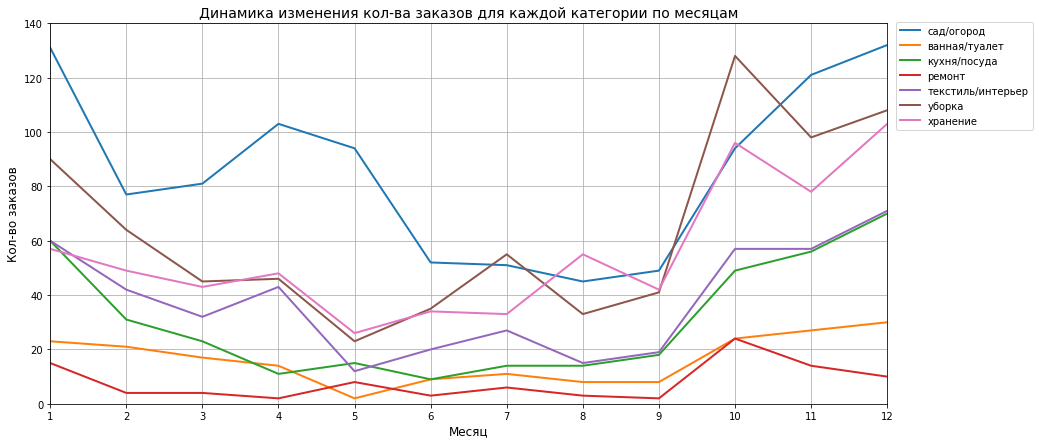

In [137]:
#построим графики изменений кол-ва заказов для каждой категории по месяцам
ecom_month_kol.plot(grid=True, figsize=(15, 7),linewidth=2.0)
plt.axis([1,12,0,140])
x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks (ticks=x_ticks)
plt.ylabel('Кол-во заказов',fontsize=12)
plt.xlabel('Месяц',fontsize=12)
plt.title('Динамика изменения кол-ва заказов для каждой категории по месяцам',fontsize=14)
plt.legend(ncol=1, bbox_to_anchor=(1.01, 0.72), loc='lower left', borderaxespad=0)
plt.show()

По графику видно, что больше всего заказов в категории сад/огород, как мы и отмечали раньше, при этом пик продаж приходится на октябрь,ноябрь, декабрь, январь, чуть меньше на апрель, май. Похоже, что клиенты приобретают семена заранее, еще с осени ищут то, что им нужно. В апреле - мае продаются саженцы, видимо то что сажают под лето. В летние месяцы кол-во заказов в этой категории меньше всего.

В категории уборка также наблюдаются пики продаж - октябрь, ноябрь - межсезонье, когда необходимо покупать товары для уборки листвы, снега. Также много заказов в декабре и январе. Меньше всего заказов приходится на май, возможно это связано с праздниками, также рост числа заказов наблюдается в июле. В остальные месяцы ккол-во заказов приблизительно одинаково. 

В категории хранение больше всего кол-во заказов приходится на октябрь, ноябрь и декабрь, также много заказов в августе. В остальные месяцы число заказов различается не сильно.

В категории текстиль/интерьер пик заказов приходится на декабрь, это связано скорее всего с Новым годом, вырастают продажи товаров этого ассортимента, плюс текстиль и товары для дома покупаются для подарков. Также большое число заказов наблюдается в октябре, ноябре, январе. Меньше всего заказов в мае.

В категории кухня/посуда с марта по сентябрь наблюдается стабильность  в кол-ве заказов. Пик заказов приходится на октябрь, декабрь, январь. Меньше всего заказов в июне.

В категории ванная/туалет в кол-ве заказов наблюдается равномерность в течение года. Пик кол-ва заказов приходится на декабрь, январь. Меньше всего заказов в мае.

В категории ремонт в кол-ве заказов наблюдается равномерность в течение года. Пик кол-ва заказов приходится на октябрь. Меньше всего заказов в апреле и сентябре. 

В целом из полученного графика видно, что больше всего сезонности подвержена категория сад/огород. Остальные категории в целом проявляют похожие тенденции, больше всего заказов приходится с октября по январь. Меньше всего в мае-сентябре.  


#### Динамика изменений выручки по категориям по месяцам

In [138]:
#выведем сводную таблицу, в которой будут отражены выручка по категориям и месяцам.
ecom_month_revenue = ecom.pivot_table(index=['month'], columns=['category'], values=['price_quantity'], aggfunc='sum')
ecom_month_revenue.columns = ecom_month_revenue.columns.droplevel(level=0)

In [139]:
ecom_month_revenue=ecom_month_revenue.round(1)

In [140]:
ecom_month_revenue

category,cад/огород,ванная/туалет,кухня/посуда,ремонт,текстиль/интерьер,уборка,хранение
month,,,,,,,
1,40876.2,33599.0,42872.5,20328.3,88850.3,96146.0,85481.0
2,29717.0,25462.0,29145.0,6137.0,28250.0,77763.0,107972.0
3,48016.0,19269.0,17738.0,2885.0,17915.0,55613.0,88101.0
4,94087.0,12114.0,17403.0,3096.0,41062.0,48159.0,100201.0
5,106794.0,2504.0,12843.0,11476.0,21111.0,20584.0,53502.0
6,39783.0,6104.0,4363.0,9583.0,38083.0,40273.0,95435.0
7,30357.0,18719.0,8128.0,8691.0,15784.0,84733.0,59949.0
8,25773.0,9645.0,7745.0,12297.0,9434.0,30999.0,85017.0
9,19658.0,10125.0,23114.0,825.0,21574.0,39245.0,63381.0


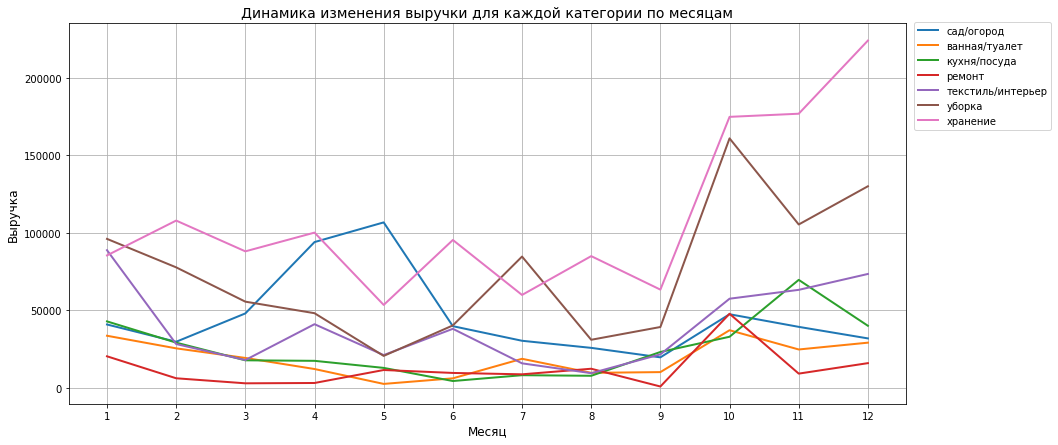

In [141]:
#построим графики изменений выручки для каждой категории по месяцам
ecom_month_revenue.plot(grid=True, figsize=(15, 7),linewidth=2.0)
#plt.axis([1,12,0,140])
x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks (ticks=x_ticks)
plt.ylabel('Выручка',fontsize=12)
plt.xlabel('Месяц',fontsize=12)
plt.title('Динамика изменения выручки для каждой категории по месяцам',fontsize=14)
plt.legend(ncol=1, bbox_to_anchor=(1.01, 0.72), loc='lower left', borderaxespad=0)
plt.show()

Самая прибыльная категория, категория хранения. В целом наибольшая выручка наблюдается с октября по декабрь во всех категориях. Интересно отметить, что категория сад/огород, которая лидировала по кол-ву заказов, по выручке находится не на первом месте, также стоит отметить, что больше всего эта категория приносит прибыли в апреле-мае, а не в октябре-декабре, когда больше всего заказов. Видимо это тсвязано с тем, что в апреле, мае берут более дорогие товары, саженцы, а не семена. 

Меньше всего колебаний выручки наблюдается в категориях ванная/туалет(не считаем оптовую покупку), кухня/посуда и ремонт.Колебания выручки от месяцв к месяцу заметны в категориях сад-огород, хранение, уборка, текстиль/интерьер.

#### Динамика изменений кол-ва заказов по категориям по дням недели

In [142]:
#выведем сводную таблицу, в которой будут отражены кол-во заказов по категориям и дням недели.
ecom_weekday_kol = ecom.pivot_table(index=['weekday'], columns=['category'], values=['order_id'], aggfunc='nunique')
ecom_weekday_kol.columns = ecom_weekday_kol.columns.droplevel(level=0)

In [143]:
ecom_weekday_kol

category,cад/огород,ванная/туалет,кухня/посуда,ремонт,текстиль/интерьер,уборка,хранение
weekday,,,,,,,
0,172,42,70,8,67,141,97
1,173,29,61,16,73,139,111
2,164,26,54,16,67,108,110
3,172,31,58,12,77,109,103
4,134,20,51,13,62,102,95
5,96,22,35,14,45,75,67
6,120,24,41,17,65,95,81


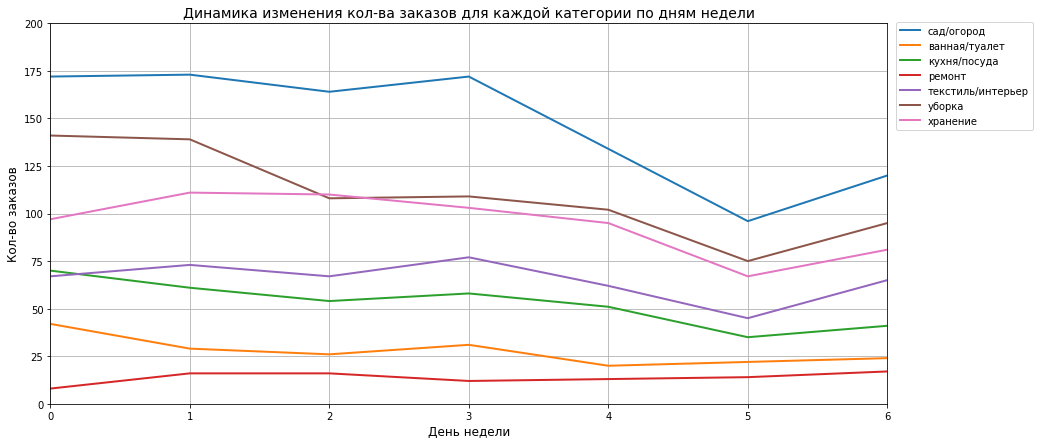

In [144]:
#построим графики изменений кол-ва заказов для каждой категории по дням недели
ecom_weekday_kol.plot(grid=True, figsize=(15, 7),linewidth=2.0)
plt.axis([0,6,0,200])
x_ticks = [0,1,2,3,4,5,6]
plt.xticks (ticks=x_ticks)
plt.ylabel('Кол-во заказов',fontsize=12)
plt.xlabel('День недели',fontsize=12)
plt.title('Динамика изменения кол-ва заказов для каждой категории по дням недели',fontsize=14)
plt.legend(ncol=1, bbox_to_anchor=(1.01, 0.72), loc='lower left', borderaxespad=0)
plt.show()

По графику видно, что меньше всего заказов приходится на пятницу, субботу и воскресенье.

#### Динамика изменений выручки по категориям по дням недели

In [145]:
#выведем сводную таблицу, в которой будут отражены выручка по категориям и месяцам.
ecom_weekday_revenue = ecom.pivot_table(index=['weekday'], columns=['category'], values=['price_quantity'], aggfunc='sum')
ecom_weekday_revenue.columns = ecom_weekday_revenue.columns.droplevel(level=0)

In [146]:
ecom_weekday_revenue=ecom_weekday_revenue.round(1)

In [147]:
ecom_weekday_revenue

category,cад/огород,ванная/туалет,кухня/посуда,ремонт,текстиль/интерьер,уборка,хранение
weekday,,,,,,,
0,107043.0,63440.0,62759.5,20016.0,54196.0,175383.2,175382.0
1,94082.2,43699.0,46330.0,26620.0,113346.3,140222.0,299642.0
2,87944.3,28035.0,38289.0,23212.3,65161.0,129678.0,201254.5
3,94139.3,24741.0,75069.0,23051.0,81162.0,137628.0,185936.5
4,72852.0,21341.0,43605.5,18082.0,82714.5,123371.5,208561.2
5,44667.0,23694.0,16847.0,18012.0,33759.0,82017.0,104725.0
6,53046.5,23624.0,23126.0,19180.0,45986.0,101850.0,139656.0


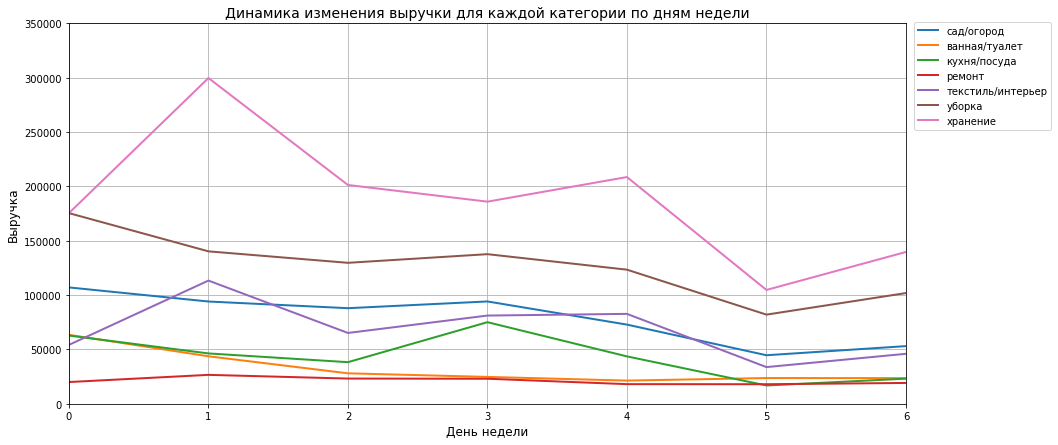

In [148]:
#построим графики изменений выручки для каждой категории по дням недели
ecom_weekday_revenue.plot(grid=True, figsize=(15, 7),linewidth=2.0)
plt.axis([0,6,0,350000])
x_ticks = [0,1,2,3,4,5,6]
plt.xticks (ticks=x_ticks)
plt.ylabel('Выручка',fontsize=12)
plt.xlabel('День недели',fontsize=12)
plt.title('Динамика изменения выручки для каждой категории по дням недели',fontsize=14)
plt.legend(ncol=1, bbox_to_anchor=(1.01, 0.72), loc='lower left', borderaxespad=0)
plt.show()

Прибыль меньше всего в субботу и воскресенье. В категории ванная/туалет и ремонт выручка распределена равномерно (искл. оптовый заказ). В остальных категориях есть колебания прибыли в течение недели. Больше всего выручки приносит категория хранения.

#### Динамика изменений кол-ва заказов по категориям по времени

In [149]:
#выведем сводную таблицу, в которой будут отражены кол-во заказов по категориям и времени
ecom_time_kol = ecom.pivot_table(index=['time'], columns=['category'], values=['order_id'], aggfunc='nunique')
ecom_time_kol.columns = ecom_time_kol.columns.droplevel(level=0)

In [150]:
ecom_time_kol

category,cад/огород,ванная/туалет,кухня/посуда,ремонт,текстиль/интерьер,уборка,хранение
time,,,,,,,
0,18.0,4.0,4.0,1.0,10.0,10.0,10.0
1,12.0,1.0,6.0,NaN,5.0,4.0,5.0
2,6.0,NaN,2.0,1.0,3.0,6.0,6.0
3,1.0,NaN,1.0,1.0,NaN,3.0,5.0
4,5.0,2.0,4.0,NaN,3.0,7.0,5.0
5,11.0,NaN,3.0,NaN,1.0,2.0,6.0
6,11.0,2.0,2.0,NaN,6.0,10.0,8.0
7,19.0,4.0,1.0,4.0,8.0,24.0,19.0
8,40.0,11.0,15.0,7.0,20.0,36.0,27.0


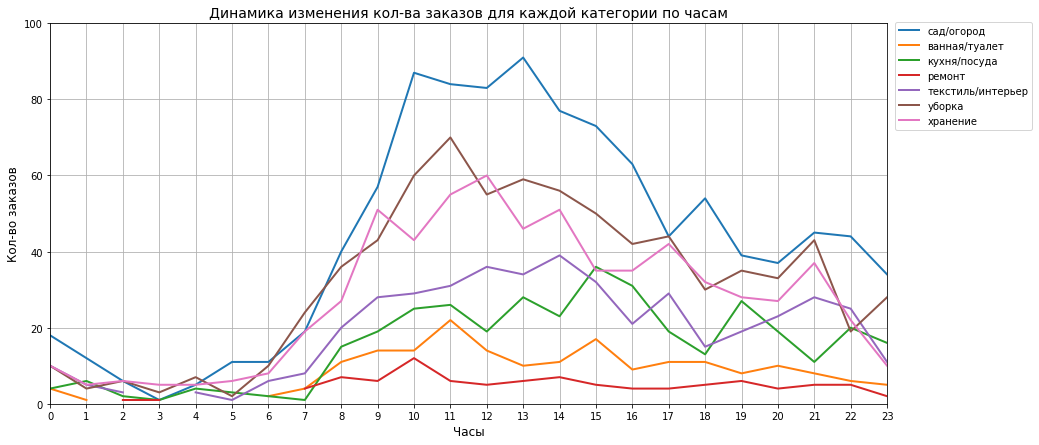

In [151]:
#построим графики изменений кол-ва заказов для каждой категории по дням недели
ecom_time_kol.plot(grid=True, figsize=(15, 7),linewidth=2.0)
plt.axis([0,23,0,100])
x_ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks (ticks=x_ticks)
plt.ylabel('Кол-во заказов',fontsize=12)
plt.xlabel('Часы',fontsize=12)
plt.title('Динамика изменения кол-ва заказов для каждой категории по часам',fontsize=14)
plt.legend(ncol=1, bbox_to_anchor=(1.01, 0.72), loc='lower left', borderaxespad=0)
plt.show()

Больше всего заказов наблюдается с 9 до 17. Пик заказов для категории сад/огород приходится на 10 и 13 часов, меньше всего в 3 ночи. Для категории уборка пик заказов приходится на 11 часов, меньше всего в 3 и 5 ночи. Для категории хранение пик заказов приходится на 12 часов, меньше всего в ночное время с 1 ночи до 6 утра. В категории текстиль/интерьер больше всего заказов в 14 часов, в категории кухня/посуда в 15 часов, ванная/туалет - 11 часов, ремонт - 10 часов. Меньше всего заказов в ночное время с 12 ночи до 7 утра.

#### Динамика изменений выручки по категориям по времени

In [152]:
#выведем сводную таблицу, в которой будут отражены выручка по категориям и месяцам.
ecom_time_revenue = ecom.pivot_table(index=['time'], columns=['category'], values=['price_quantity'], aggfunc='sum')
ecom_time_revenue.columns = ecom_time_revenue.columns.droplevel(level=0)

In [153]:
ecom_time_revenue=ecom_time_revenue.round(1)

In [154]:
ecom_time_revenue

category,cад/огород,ванная/туалет,кухня/посуда,ремонт,текстиль/интерьер,уборка,хранение
time,,,,,,,
0,3977.8,7038.0,1728.0,1949.0,5808.2,13386.5,13026.0
1,5293.0,1162.0,3612.0,NaN,2701.0,4173.0,10227.0
2,3452.0,NaN,2578.0,2999.0,651.0,2410.0,16310.0
3,188.0,NaN,1199.0,2099.0,NaN,2181.5,5583.5
4,1959.3,3373.0,3767.0,NaN,1377.0,8019.0,3185.0
5,6009.0,NaN,3962.0,NaN,1207.0,3464.0,8732.5
6,4920.0,5587.0,939.0,NaN,5525.0,10691.0,27292.0
7,7073.0,6447.0,449.0,7864.0,16778.0,27221.0,86758.0
8,26642.0,19883.0,11184.5,13840.0,23775.0,44192.0,42892.0


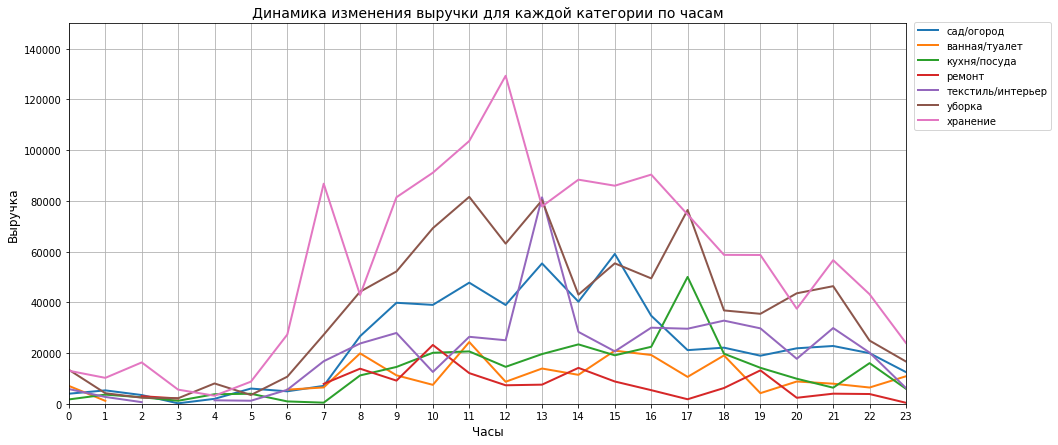

In [155]:
#построим графики изменений выручки для каждой категории по дням недели
ecom_time_revenue.plot(grid=True, figsize=(15, 7),linewidth=2.0)
plt.axis([0,23,0,150000])
x_ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks (ticks=x_ticks)
plt.ylabel('Выручка',fontsize=12)
plt.xlabel('Часы',fontsize=12)
plt.title('Динамика изменения выручки для каждой категории по часам',fontsize=14)
plt.legend(ncol=1, bbox_to_anchor=(1.01, 0.72), loc='lower left', borderaxespad=0)
plt.show()

 Больше всего выручка наблюдается в дневное время с 9 до 17. К вечеру выручка уменьшается, меньше всего выручка по всем категориям в ночное время с 12 ночи до 8 утра.

## Вывод

На этапе анализа торгового ассортимента, были выделены основной и дополнительный ассортимент товаров. Для этого использовали "ABC - анализ" по выручке и кол-ву проданного товара. Мы получили товары, распределенные по 3-м группам. Такая группировка показывает, какие позиции приносят наибольшую прибыль. Товары группы А являются целевыми — на них нужно сосредоточиться, больше производить/закупать/продавать. Нужно следить, чтобы они всегда были в наличии, организовать бесперебойные поставки, обеспечить должный контроль производства и качества. Товары из группы В приносят немного прибыли. Однако они расширяют ассортимент и обеспечивают небольшой, но стабильный доход. Товары из группы С не приносят прибыли и практически не покупаются. Возможно, от этих позиций стоит отказаться.

Все товары были разбиты на **7 категорий** :
 - хранение
 - кухня/посуда
 - ванная/туалет
 - текстиль/интерьер
 - уборка
 - cад/огород
 - ремонт
 
По кол-ву товаров самая большая категория - **сад/огород 2669** товаров, далее идут **уборка - 820** товаров и **хранение - 761**. Меньше всего товаров в категории **ремонт - 97**. **Текстиль/интерьер-541**, **кухня/посуда - 433**, **ванная/туалет - 203.**

С помощью ABC - анализа разбили товары на основные и дополнительные, еще добавили категорию аутсайдеры - СС, товары которые приносят меньше всего прибыли и не продаются.

В каждой категории выделили **топ-5 самых продаваемых товаров по кол-ву заказов**:

 - В категории *сад/огород* самыми продаваемыми товарами является пеларгония(герань), а самыми прибыльными товарами являются растения спатифиллум,пеларгония(герань), эвкалипт.
 - В категории *хранение* самыми продаваемыми товарами являются сумки-тележки и тележки.
 - В категории *уборка* наибольшей популярностью пользуются сушилки для белья (настенные, потолочные, напольные) и пластмассовые тазы.
 - В категории *текстиль/интерьер* наиболее популярны муляжи овощей и фруктов, искусственные цветочные композиции и новогодние ели.
 - В категории *ванная/туалет* наиболее популярны ершики для унитаза, шторы и штанги и сиденье для ванны.
 - В категории *ремонт* самые продаваемые товары оконные стяжки, бензин для зажигалок, термометры уличные, линейки.
 - В категории *кухня/посуда* наибольшим спросом пользуются овощеварки, кувшины, салатники, термокружки, банки с крышкой.

И **топ-5 самых прибыльных товаров по выручке**:

 - В категории *сад/огород* самыми прибыльными товарами являются растения спатифиллум,пеларгония(герань), эвкалипт.
 - В категории *хранение* самыми прибыльными товарами являются сумки-тележки, тележки, вешалки и мусорные контейнеры.
 - В категории *уборка* самыми прибыльными товарами являются сушилки для белья, веники, гладильные доски.
 - В категории *текстиль/интерьер* самыми прибыльными товарами являются муляжи овощей, коврик придверный, постельные принадлежности: простынь, наматрацник, одеяло.
 - В категории *ванная/туалет* самыми прибыльными товарами являются вантуз, шторы комплект для мытья полов, коврик.
 - В категории *ремонт* самыми прибыльными товарами являются стремянки.
 - В категории *кухня/посуда* самыми прибыльными товарами являются ноди, салфетки, термокружки, банки, тарелки.

##### Провели сравнительный анализ категорий товаров по выручке и кол-ву проданных товаров.

**Больше всего клиенты магазина покупают в категории сад/огород 28,8%**. Покупки в категориях **уборка и хранение** занимают 2 -ое место, их доля от всех заказов **21.4% и 18.6%** соответственно. Меньше всего заказов в категории **ремонт** всего **2.6%** и **ванная/туалет - 5.5%**. **Текстиль/интерьер - 12.7%**, **кухня/посуда - 10.4%**.

**Наибольшую выручку магазин получает от продаж в категории хранение - 28,8%**. Продажи в категориях ****ванная/туалет** и **уборка** приносят **19,7% и 19,4%** выручки соответсвенно. Лидер по кол-ву заказов - **сад/огород**приносит всего лишь **11,8%** от общей выручки. **Текстиль/интерьер - 10,3%**. Выручка от категорий **кухня/посуда - 6,9%**. Меньше всего выручку магазину приносит та же категория, что и по кол-ву заказов - **ремонт 3,1%**.


##### Рассмотрели динамику изменений кол-ва и прибыли заказов по категориям по месяцам, дням недели и часам.

В категории сад/огород пик продаж приходится на октябрь,ноябрь, декабрь, январь, чуть меньше на апрель, май. Похоже, что клиенты приобретают семена заранее, еще с осени ищут то, что им нужно. В апреле - мае продаются саженцы, видимо то что сажают под лето. В летние месяцы кол-во заказов в этой категории меньше всего.
В целом больше всего сезонности подвержена категория сад/огород. Остальные категории в целом проявляют схожие тенденции, больше всего заказов приходится с октября по январь,меньше всего в мае и сентябре.  

Наибольшая выручка наблюдается с октября по декабрь во всех категориях. Интересно отметить, что категория сад/огород, которая лидировала по кол-ву заказов, по выручке находится не на первом месте, также стоит отметить, что больше всего эта категория приносит прибыли в апреле-мае, а не в октябре-декабре, когда больше всего заказов. Видимо это тсвязано с тем, что в апреле, мае берут более дорогие товары, саженцы, а не семена.  
Меньше всего колебаний выручки наблюдается в категориях ванная/туалет(не считаем оптовую покупку), кухня/посуда и ремонт.Колебания выручки от месяца к месяцу заметны в категориях сад-огород, хранение, уборка, текстиль/интерьер.

Меньше всего заказов оформляют в пятницу, субботу и воскресенье. Прибыль меньше всего в субботу и воскресенье. В категории ванная/туалет и ремонт выручка распределена равномерно (искл. оптовый заказ). В остальных категориях есть колебания прибыли в течение недели.

Больше всего заказов наблюдается с 9 до 17 для всех категорий. Меньше всего заказов в ночное время с 12 ночи до 7 утра.

Больше всего выручка наблюдается в дневное время с 9 до 17. К вечеру выручка уменьшается, меньше всего выручка по всем категориям в ночное время с 12 ночи до 8 утра.


Таким образом:
- магазин в основном зарабатывает на сумках-тележках и товарах для хранения. 
- чаще всего заказывают из категории сад/огород. Категория сад/огород подвержена сезонности, пик продаж приходится с октябрь по январь, чуть меньше на апрель, май. При этом больше всего эта категория приносит прибыли в апреле-мае, с началом дачного сезона. 
 - наибольшая выручка наблюдается с октября по декабрь во всех категориях, что возможно связано с праздниками.
 - во всех категориях товара пик приходится на рабочие часы (9-17) и будние дни
 - в ночное время заказы падают, потому что люди, как правило спят.

## 5. Формулировка и проверка статистических гипотез

### Проверка гипотезы:средняя выручка в будни и выходные дни одинакова

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза**: Средняя выручка в будни и выходные одинакова.

**Альтернативная гипотеза** : Средняя выручка в будни и выходные разная.

Будем проверять гипотезу о равенстве средних двух генеральных совокупностей.

От выбора уровня статистической значимости зависит, как далеко должно оказаться наблюдаемое значение от предполагаемого в нулевой гипотезе, чтобы отвергнуть её. Конвенциональные значения — 1% и 5%. Примем значение 0,05. Уровень значимости задаёт порог: начиная с какой вероятности наблюдаемое значение считается слишком далёким от предполагаемого, то есть слишком маловероятным.

Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

Посчитаем размер выборок:

In [156]:
#выборка за выходные дни
len(ecom.query('weekday in [5,6]'))

1209

In [157]:
#выборка за будние дни
len(ecom.query('weekday not in [5,6]'))

4312

Так как выборки разного размера укажем параметр equal_var=False.

In [158]:
# задаём уровень значимости
alpha = 0.05

#средняя выручка в выходные
avg_revenue_weekend = ecom.query('weekday in [5,6]')['price_quantity']

#средняя выручка в будние дни

avg_revenue_weekday = ecom.query('weekday not in [5,6]')['price_quantity']

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу 
results = st.ttest_ind(avg_revenue_weekend, avg_revenue_weekday, equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.0007363036964606593
Отвергаем нулевую гипотезу


Полученное значение p-value (0.0007) меньше заданного уровня значимости (0.05), поэтому отвергаем нулевую гипотезу. Есть основание предположить, что наше предположение о равенстве средней выручки в будние и выходные дни ошибочно. 

In [159]:
ecom.query('weekday in [5,6]')['price_quantity'].mean() 

603.9615384615385

In [160]:
ecom.query('weekday not in [5,6]')['price_quantity'].mean()

739.3297580395795

### Проверка гипотезы: Количество заказов в дневное время равно количеству заказов вечером;

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза**:Количество заказов в дневное время и вечернее одинаковы.

**Альтернативная гипотеза** : Количество заказов в дневное время и вечернее различаются.

Примем за вечернее время промежуток с 18 до 6 а за дневное с 6 до 18.00

In [161]:
#выборка за вечернее время
len(ecom.query('(0 <= time <= 6) or(18<= time <=23)'))

1602

In [162]:
#выборка за дневное время
len(ecom.query(' 6 < time < 18'))

3919

In [163]:
# задаём уровень значимости
alpha = 0.05

#дневные заказы
avg_orders_day = ecom.query(' 6 < time < 18')['order_id']

#вечерние заказы
avg_orders_evening = ecom.query('(0 <= time <= 6) or (18<= time <=24)')['order_id']

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу 
results = st.ttest_ind(avg_orders_day, avg_orders_evening, equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0791069004734275e-11
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости (0.05), поэтому отвергаем нулевую гипотезу. Есть основание предположить, что наше предположение о равенстве среднего кол-ва заказов в дневное и вечернее время ошибочно. Кол-во заказов различается. Это логично, так как в вечернее время и ночное большинство пользователей отдыхает.

In [164]:
ecom_day = ecom.query(' 6 < time < 18').groupby('time').agg({'order_id':'nunique'})

In [165]:
#кол-во заказов в дневноое время
ecom_day['order_id'].sum()

2416

In [166]:
ecom_evening = ecom.query('(0 <= time <= 6) or (18<= time <=24)').groupby('time').agg({'order_id':'nunique'})

In [167]:
#кол-во заказов в вечернее время
ecom_evening['order_id'].sum()

1091

Были проверены гипотезы, получили следующие результаты:
- Есть основание предположить, что средняя выручка в будни и выходные одинакова.
- Кол-во заказов в дневное и вечернее время различается.

## Вывод
Требовалось проанализировать товарный ассортимент интернет-магазина "Пока все еще тут", чтобы помочь магазину стать лучше.

Анализ состоял из нескольких этапов:

**На этапе изучения данных и их предобработки**:
 - преобразовали тип данных столбца date к формату datetime
 - добавили столбцы date_only, month, weekday, hour для дельнейших расчетов
 - столбец product привели к строчному регистру, удалили лишние пробелы, заменили букву ё на е, заменили 'tepмо' на 'термо'
 - пропущенных значений в данных не оказалось
 - явных дубликатов не обнаружили
 - удалили 1886 или 25%  частичных дубликатов (id покупателя, товар, id заказа)

**На этапе исследовательского анализа данных выяснили, что**
 - рассматриваемый временной период с 2018-10-01 по 2020-01-31. Аномалий в данных не наблюдается, среднее кол-во заказов около 10, и только с марта 2019 по июль 2019 года наблюдается кол-во заказов больше 40, а пик кол-ва заказов приходится на май-июнь 2019 года.
 - нашли и удалили 29 заказов, принадлежащих одновременно от 2-х до 4-х пользователям. Видимо возникла какая-то ошибка, или пользователь делал заказы с разных аккаунтов. 
 - определили, что в среднем один пользователь делает один заказ. Пользователей с большим числом заказов удалять не стали, так как возможно это оптовики или перекупщики. 
 - изучили кол-во товаров в заказах. Получили, что медианное значение составляет 1 товар в заказе. Максимальное число товаров в заказе 1000, будем иметь это в виду, возможно, что это оптовики.
  - ассортимен магазина располагает как дешевыми товарами, так и дорогими. Минимальная стоимость товара 9 у.е, максимальная 14917 у.е. Медианная стоимость товара 150 у.е. Выбросами считаются товары со стоимостью более 1100 у.е. Учитывая тот факт, что ассортимент магазина может иметь как дорогие, так и дешевые товары, оставили имеющиеся данные как есть.
  - выяснили что самый большой % продаж в октябре,ноябре, декабре и январе (12 -15% - % числа заказов, 6-9% - % суммы продаж). 
                 Меньше всего % продаж в мае, июне, августе и в сентябре (5% - % кол-ва заказов , 3-4% - % суммы продаж). 
   
  - Меньше всего % продаж в выходные, особенно в субботу, около 10-12% - % числа заказов, 6-8% % суммы продаж. Больше всего % продаж с  понедельник по четверг около 16% - % числа заказов, 10% - % суммы продаж .В воскресенье % суммы продаж около 12%, а числа заказов около 8%.
  
   - больше всего "% продаж" приходится на дневное время с 10 до 17 (от 5,5 до 8% - %числа заказов, 4,5-5% - %суммы продаж).  В 21 час спрос опять растет до 5 % - %числа заказов, 3% - % суммы продаж. Меньше всего (не превышает 2% и 1%) "% продаж" в ночное время с 0 до 6 утра.



**На этапе анализа торгового ассортимента**, были выделены основной и дополнительный ассортимент товаров. Для этого использовали "ABC - анализ" по выручке и кол-ву проданного товара. Мы получили товары, распределенные по 3-м группам. Такая группировка показывает, какие позиции приносят наибольшую прибыль. Товары группы А являются целевыми — на них нужно сосредоточиться, больше производить/закупать/продавать. Нужно следить, чтобы они всегда были в наличии, организовать бесперебойные поставки, обеспечить должный контроль производства и качества. Товары из группы В приносят немного прибыли. Однако они расширяют ассортимент и обеспечивают небольшой, но стабильный доход. Товары из группы С не приносят прибыли и практически не покупаются. Возможно, от этих позиций стоит отказаться.

Все товары были разбиты на **7 категорий** :
 - хранение
 - кухня/посуда
 - ванная/туалет
 - текстиль/интерьер
 - уборка
 - cад/огород
 - ремонт
 
По кол-ву товаров самая большая категория - **сад/огород 2669** товаров, далее идут **уборка - 820** товаров и **хранение - 761**. Меньше всего товаров в категории **ремонт - 97**. **Текстиль/интерьер-541**, **кухня/посуда - 433**, **ванная/туалет - 203.**

В каждой категории выделили **топ-5 самых продаваемых товаров по кол-ву заказов**:

 - В категории *сад/огород* самыми продаваемыми товарами является пеларгония(герань), а самыми прибыльными товарами являются растения спатифиллум,пеларгония(герань), эвкалипт.
 - В категории *хранение* самыми продаваемыми товарами являются сумки-тележки и тележки.
 - В категории *уборка* наибольшей популярностью пользуются сушилки для белья (настенные, потолочные, напольные) и пластмассовые тазы.
 - В категории *текстиль/интерьер* наиболее популярны муляжи овощей и фруктов, искусственные цветочные композиции и новогодние ели.
 - В категории *ванная/туалет* наиболее популярны ершики для унитаза, шторы и штанги и сиденье для ванны.
 - В категории *ремонт* самые продаваемые товары оконные стяжки, бензин для зажигалок, термометры уличные, линейки.
 - В категории *кухня/посуда* наибольшим спросом пользуются овощеварки, кувшины, салатники, термокружки, банки с крышкой.

И **топ-5 самых прибыльных товаров по выручке**:

 - В категории *сад/огород* самыми прибыльными товарами являются растения спатифиллум,пеларгония(герань), эвкалипт.
 - В категории *хранение* самыми прибыльными товарами являются сумки-тележки, тележки, вешалки и мусорные контейнеры.
 - В категории *уборка* самыми прибыльными товарами являются сушилки для белья, веники, гладильные доски.
 - В категории *текстиль/интерьер* самыми прибыльными товарами являются муляжи овощей, коврик придверный, постельные принадлежности: простынь, наматрацник, одеяло.
 - В категории *ванная/туалет* самыми прибыльными товарами являются вантуз, шторы комплект для мытья полов, коврик.
 - В категории *ремонт* самыми прибыльными товарами являются стремянки.
 - В категории *кухня/посуда* самыми прибыльными товарами являются ноди, салфетки, термокружки, банки, тарелки.

**Провели сравнительный анализ категорий товаров по выручке и кол-ву проданных товаров.**

**Больше всего клиенты магазина покупают в категории сад/огород 28,8%**. Покупки в категориях **уборка и хранение** занимают 2 -ое место, их доля от всех заказов **21.4% и 18.6%** соответственно. Меньше всего заказов в категории **ремонт** всего **2.6%** и **ванная/туалет - 5.5%**. **Текстиль/интерьер - 12.7%**, **кухня/посуда - 10.4%**.

**Наибольшую выручку магазин получает от продаж в категории хранение - 28,8%**. Продажи в категориях ****ванная/туалет** и **уборка** приносят **19,7% и 19,4%** выручки соответсвенно. Лидер по кол-ву заказов - **сад/огород**приносит всего лишь **11,8%** от общей выручки. **Текстиль/интерьер - 10,3%**. Выручка от категорий **кухня/посуда - 6,9%**. Меньше всего выручку магазину приносит та же категория, что и по кол-ву заказов - **ремонт 3,1%**.

С помощью ABC - анализа разбили товары на основные и дополнительные, еще добавили категорию аутсайдеры - СС, товары которые приносят меньше всего прибыли и не продаются.

**Рассмотрели динамику изменений кол-ва заказов и прибыли по категориям по месяцам, дням недели и часам.**

В категории сад/огород пик продаж приходится на октябрь,ноябрь, декабрь, январь, чуть меньше на апрель, май. Похоже, что клиенты приобретают семена заранее, еще с осени ищут то, что им нужно. В апреле - мае продаются саженцы, видимо то что сажают под лето. В летние месяцы кол-во заказов в этой категории меньше всего.
В целом больше всего сезонности подвержена категория сад/огород. Остальные категории в целом проявляют схожие тенденции, больше всего заказов приходится с октября по январь,меньше всего в мае и сентябре.  

Наибольшая выручка наблюдается с октября по декабрь во всех категориях. Интересно отметить, что категория сад/огород, которая лидировала по кол-ву заказов, по выручке находится не на первом месте, также стоит отметить, что больше всего эта категория приносит прибыли в апреле-мае, а не в октябре-декабре, когда больше всего заказов. Видимо это тсвязано с тем, что в апреле, мае берут более дорогие товары, саженцы, а не семена.  
Меньше всего колебаний выручки наблюдается в категориях ванная/туалет(не считаем оптовую покупку), кухня/посуда и ремонт.Колебания выручки от месяца к месяцу заметны в категориях сад-огород, хранение, уборка, текстиль/интерьер.

Меньше всего заказов оформляют в пятницу, субботу и воскресенье. Прибыль меньше всего в субботу и воскресенье. В категории ванная/туалет и ремонт выручка распределена равномерно (искл. оптовый заказ). В остальных категориях есть колебания прибыли в течение недели.

Больше всего заказов наблюдается с 9 до 17 для всех категорий. Меньше всего заказов в ночное время с 12 ночи до 7 утра.

Больше всего выручка наблюдается в дневное время с 9 до 17. К вечеру выручка уменьшается, меньше всего выручка по всем категориям в ночное время с 12 ночи до 8 утра.


Таким образом:
- магазин в основном зарабатывает на сумках-тележках и товарах для хранения. 
- чаще всего заказывают из категории сад/огород. Категория сад/огород подвержена сезонности, пик продаж приходится с октябрь по январь, чуть меньше на апрель, май. При этом больше всего эта категория приносит прибыли в апреле-мае, с началом дачного сезона. 
- наибольшая выручка наблюдается с октября по декабрь во всех категориях, что возможно связано с праздниками.
- во всех категориях товара пик приходится на рабочие часы (9-17) и будние дни
- в ночное время заказы падают, потому что люди, как правило спят.

Проверили несколько гипотез, получили:
- Есть основание предположить, что средняя выручка в будни и выходные одинакова.
- Кол-во заказов в дневное и вечернее время различается.

**РЕКОМЕНДАЦИИ**:

Изучить, полученный в результате ABC -анализа ассортимент товаров, по необходимости избавиться от товаров, попавших в группу аутсайдеры (СС). Особое внимание уделить товарам, попавшим в категорию основные - это целевые товары.
Они приносят значительный доход, часто покупаются, приносят выручку. А значит должны постоянно быть в наличии, с бесперебойными поставками и хорошим запасом. Также можно расширить их ассортимент Например, для сада/огорода продавать удобрения, землю, садовый инвентарь и т.д. Также можно устраивать акции и распродажи товаров целевых категорий  в пиковые месяцы продаж с октября по январь или для сада/огорода к началу дачного сезона. 

Товары из категории дополнительные приносят немного прибыли. Однако они расширяют ассортимент и обеспечивают небольшой, но стабильный доход. 



### Ссылка на презентацию: https://disk.yandex.ru/i/UC6zolQDXImd2Q